## **Assignment - EDA -Expolatary data Analysis**
### **Name - Aditya Naresh Burde**

# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [ ]:
# Import warnings

import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Import the libraries you will be using for analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

%matplotlib inline


In [ ]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 2.0.2
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [ ]:
# Try loading one file

df = pd.read_parquet('/content/2023-1.parquet')
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

In [ ]:
df.shape

(3041714, 19)

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [ ]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Change working directory
os.chdir('/content/drive/MyDrive/Aditya_Upgrad_EDA_Assignment/Datasets and Dictionary-NYC/Datasets and Dictionary/trip_records')

# Create a sorted list of all parquet files
file_list = sorted([f for f in os.listdir() if f.endswith('.parquet')])
print(f"Found {len(file_list)} parquet files")

# Initialize an empty dataframe to store sampled data
df = pd.DataFrame()
# Initialize an empty dataframe to store sampled data
Max_Rows = 290000
num_files = len(file_list)
rows_per_month = Max_Rows // num_files

print(f"Target rows per month: {rows_per_month}")
# Iterate through the list of files and sample one by one
for file_name in file_list:
    if len(df) >= Max_Rows:
        break
    try:
      # File path for the current file
        file_path = os.path.join(os.getcwd(), file_name)
        print(f"Processing file: {file_name}")

        # Read parquet file
        monthly_data = pd.read_parquet(file_path)

        # Ensure datetime conversion
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])

        # Extract date and hour
        monthly_data['date'] = monthly_data['tpep_pickup_datetime'].dt.date
        monthly_data['hour'] = monthly_data['tpep_pickup_datetime'].dt.hour

        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['date'].unique():
            if len(sampled_data) >= rows_per_month:
                break
            day_data = monthly_data[monthly_data['date'] == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                if len(sampled_data) >= rows_per_month:
                    break
                hourly_data = day_data[day_data['hour'] == hour]

                if not hourly_data.empty:
                    # Sample 5% of the hourly data randomly
                    sampled_hour = hourly_data.sample(frac=0.05, random_state=42)
                    # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data, sampled_hour], ignore_index=True)
        if len(sampled_data) > rows_per_month:
            sampled_data = sampled_data.sample(n=rows_per_month, random_state=42)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df, sampled_data], ignore_index=True)
        print(f"Records sampled from file: {len(sampled_data):,}")
        print(f"Current total records: {len(df):,}")
    except Exception as e:
        print(f"Error processing file {file_name}: {e}")
print("Final sampled data shape:", df.shape)
os.chdir("../../")


Found 12 parquet files
Target rows per month: 24166
Processing file: 2023-1.parquet
Records sampled from file: 24,166
Current total records: 24,166
Processing file: 2023-10.parquet
Records sampled from file: 24,166
Current total records: 48,332
Processing file: 2023-11.parquet
Records sampled from file: 24,166
Current total records: 72,498
Processing file: 2023-12.parquet
Records sampled from file: 24,166
Current total records: 96,664
Processing file: 2023-2.parquet
Records sampled from file: 24,166
Current total records: 120,830
Processing file: 2023-3.parquet
Records sampled from file: 24,166
Current total records: 144,996
Processing file: 2023-4.parquet
Records sampled from file: 24,166
Current total records: 169,162
Processing file: 2023-5.parquet
Records sampled from file: 24,166
Current total records: 193,328
Processing file: 2023-6.parquet
Records sampled from file: 24,166
Current total records: 217,494
Processing file: 2023-7.parquet
Records sampled from file: 24,166
Current to

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289992 entries, 0 to 289991
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               289992 non-null  int64         
 1   tpep_pickup_datetime   289992 non-null  datetime64[us]
 2   tpep_dropoff_datetime  289992 non-null  datetime64[us]
 3   passenger_count        281204 non-null  float64       
 4   trip_distance          289992 non-null  float64       
 5   RatecodeID             281204 non-null  float64       
 6   store_and_fwd_flag     281204 non-null  object        
 7   PULocationID           289992 non-null  int64         
 8   DOLocationID           289992 non-null  int64         
 9   payment_type           289992 non-null  int64         
 10  fare_amount            289992 non-null  float64       
 11  extra                  289992 non-null  float64       
 12  mta_tax                289992 non-null  floa

After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [ ]:
# Store the df in csv/parquet
df.to_csv('sampled_data.csv', index=False)

## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [ ]:
# Load the new data file
df = pd.read_csv('/content/drive/MyDrive/Aditya_Upgrad_EDA_Assignment/Datasets and Dictionary-NYC/sampled_data.csv')

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1         2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2         2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3         2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4         2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   

   trip_distance  RatecodeID store_and_fwd_flag  PULocationID  DOLocationID  \
0           5.12         1.0                  N           114           142   
1          10.35         1.0                  N           244           137   
2           3.79         1.0                  N           107           262   
3           0.72         1.0                  N           170           233   
4           8.74         1.0                  N           138           237   

   payment_type  ...  mta_tax  tip_amount  tolls_amount  \
0             1  ...      0.5        1.00          0.00   
1             1  ...      0.5       12.78          0.00   
2             1  ...      0.5        3.30          0.00   
3             2  ...      0.5        0.00          0.00   
4             1  ...      0.5        8.00          6.55   

   improvement_surcharge  total_amount  congestion_surcharge  airport_fee  \
0                    1.0         34.90                   2.5         0.00   
1                    1.0         63.88                   2.5         0.00   
2                    1.0         25.30                   2.5         0.00   
3                    1.0         12.90                   2.5         0.00   
4                    1.0         70.20                   2.5         1.25   

         date  hour Airport_fee  
0  2023-01-02    21         NaN  
1  2023-01-06     8         NaN  
2  2023-01-01    22         NaN  
3  2023-01-05    22         NaN  
4  2023-01-03    16         NaN  

[5 rows x 22 columns]

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289992 entries, 0 to 289991
Data columns (total 22 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               289992 non-null  int64  
 1   tpep_pickup_datetime   289992 non-null  object 
 2   tpep_dropoff_datetime  289992 non-null  object 
 3   passenger_count        281204 non-null  float64
 4   trip_distance          289992 non-null  float64
 5   RatecodeID             281204 non-null  float64
 6   store_and_fwd_flag     281204 non-null  object 
 7   PULocationID           289992 non-null  int64  
 8   DOLocationID           289992 non-null  int64  
 9   payment_type           289992 non-null  int64  
 10  fare_amount            289992 non-null  float64
 11  extra                  289992 non-null  float64
 12  mta_tax                289992 non-null  float64
 13  tip_amount             289992 non-null  float64
 14  tolls_amount           289992 non-nu

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [ ]:
# Fix the index and drop any columns that are not needed
columns_to_delete = ['store_and_fwd_flag', 'mta_tax', 'improvement_surcharge']
df = df.drop(columns=columns_to_delete)
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1         2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2         2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3         2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4         2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0           5.12         1.0           114           142             1   
1          10.35         1.0           244           137             1   
2           3.79         1.0           107           262             1   
3           0.72         1.0           170           233             2   
4           8.74         1.0           138           237             1   

   fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0         28.9    1.0        1.00          0.00         34.90   
1         47.1    0.0       12.78          0.00         63.88   
2         17.0    1.0        3.30          0.00         25.30   
3          7.9    1.0        0.00          0.00         12.90   
4         42.9    7.5        8.00          6.55         70.20   

   congestion_surcharge  airport_fee        date  hour  Airport_fee  
0                   2.5         0.00  2023-01-02    21          NaN  
1                   2.5         0.00  2023-01-06     8          NaN  
2                   2.5         0.00  2023-01-01    22          NaN  
3                   2.5         0.00  2023-01-05    22          NaN  
4                   2.5         1.25  2023-01-03    16          NaN

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'airport_fee',
       'date', 'hour', 'Airport_fee'],
      dtype='object')

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [ ]:
# Combine the two airport fee columns
if 'airport_fee' in df.columns and 'Airport_fee' in df.columns:
    airport_fee_count = df['airport_fee'].notna().sum()
    Airport_fee_count = df['Airport_fee'].notna().sum()
    print(f"Non-NaN counts - airport_fee: {airport_fee_count}, Airport_fee: {Airport_fee_count}")
    if airport_fee_count == 0:
        print("'airport_fee' is completely empty. Dropping this column.")
        df = df.drop(columns=['airport_fee'])
    elif Airport_fee_count == 0:
        print("'Airport_fee' is completely empty. Dropping this column.")
        df = df.drop(columns=['Airport_fee'])
    else:
        if airport_fee_count > Airport_fee_count:
            print("'airport_fee' has more valid values. Dropping 'Airport_fee'.")
            df = df.drop(columns=['Airport_fee'])
        elif Airport_fee_count > airport_fee_count:
            print("'Airport_fee' has more valid values. Dropping 'airport_fee'.")
            df = df.drop(columns=['airport_fee'])
        else:
            print("Both columns have valid values. Combining them.")
            df['airport_fee_combined'] = df['airport_fee'].combine_first(df['Airport_fee'])
            df = df.drop(columns=['airport_fee', 'Airport_fee'])
else:
    print("One or both of the columns 'airport_fee' or 'Airport_fee' do not exist in the dataset.")


Non-NaN counts - airport_fee: 23522, Airport_fee: 257682
'Airport_fee' has more valid values. Dropping 'airport_fee'.


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289992 entries, 0 to 289991
Data columns (total 18 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   VendorID               289992 non-null  int64  
 1   tpep_pickup_datetime   289992 non-null  object 
 2   tpep_dropoff_datetime  289992 non-null  object 
 3   passenger_count        281204 non-null  float64
 4   trip_distance          289992 non-null  float64
 5   RatecodeID             281204 non-null  float64
 6   PULocationID           289992 non-null  int64  
 7   DOLocationID           289992 non-null  int64  
 8   payment_type           289992 non-null  int64  
 9   fare_amount            289992 non-null  float64
 10  extra                  289992 non-null  float64
 11  tip_amount             289992 non-null  float64
 12  tolls_amount           289992 non-null  float64
 13  total_amount           289992 non-null  float64
 14  congestion_surcharge   281204 non-nu

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [ ]:
# check where values of fare amount are negative
monetary_columns = ['fare_amount', 'tip_amount', 'tolls_amount', 'total_amount',
                    'congestion_surcharge', 'airport_fee', 'improvement_surcharge', 'MTA_tax']
for column in monetary_columns:
    if column in df.columns:
        negative_count = (df[column] < 0).sum()
        print(f"Column '{column}' has {negative_count} negative values.")
        df[column] = df[column].abs()
df.to_parquet('updated_file.parquet', index=False)
print("Negative monetary values have been fixed.")

Column 'fare_amount' has 0 negative values.
Column 'tip_amount' has 0 negative values.
Column 'tolls_amount' has 0 negative values.
Column 'total_amount' has 15 negative values.
Column 'congestion_surcharge' has 8 negative values.
Negative monetary values have been fixed.


Did you notice something different in the `RatecodeID` column for above records?

In [ ]:
# Analyse RatecodeID for the negative fare amounts
negative_fares = df[df['fare_amount'] < 0]
ratecode_analysis = (
    negative_fares.groupby('RatecodeID')['fare_amount']
    .agg(['count', 'mean', 'min', 'max'])
    .reset_index()
)

print("Analysis of RatecodeID for Negative fare_amounts:")
print(ratecode_analysis)


Analysis of RatecodeID for Negative fare_amounts:
Empty DataFrame
Columns: [RatecodeID, count, mean, min, max]
Index: []


In [ ]:
# Find which columns have negative values
numeric_columns = df.select_dtypes(include=['number']).columns
columns_with_negatives = [col for col in numeric_columns if (df[col] < 0).any()]

print("Columns with negative values:", columns_with_negatives)

Columns with negative values: ['Airport_fee']


In [ ]:
# fix these negative values
df[numeric_columns] = df[numeric_columns].applymap(lambda x: 0 if x < 0 else x)

### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [ ]:
# Find the proportion of missing values in each column
missing_values_proportion = df.isnull().mean()
print("Proportion of missing values in each column:")
print(missing_values_proportion)

Proportion of missing values in each column:
VendorID                 0.000000
tpep_pickup_datetime     0.000000
tpep_dropoff_datetime    0.000000
passenger_count          0.030304
trip_distance            0.000000
RatecodeID               0.030304
PULocationID             0.000000
DOLocationID             0.000000
payment_type             0.000000
fare_amount              0.000000
extra                    0.000000
tip_amount               0.000000
tolls_amount             0.000000
total_amount             0.000000
congestion_surcharge     0.030304
date                     0.000000
hour                     0.000000
Airport_fee              0.111417
dtype: float64


In [ ]:
plt.figure(figsize=(8, 5))
missing_values_proportion.plot(kind='bar', color='skyblue')
plt.title('Proportion of Missing Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Proportion of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [ ]:
# Display the rows with null values
print("Rows with null values:")
rows_with_nulls = df[df.isnull().any(axis=1)]
display(rows_with_nulls)
missing_passenger_count = df['passenger_count'].isnull().sum()
print(f"Number of missing values in 'passenger_count': {missing_passenger_count}")
median_value = df['passenger_count'].median()
df['passenger_count'] = df['passenger_count'].fillna(median_value)
print(f"Missing values in 'passenger_count' have been imputed with the median value: {median_value}")


Rows with null values:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1              2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2              2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3              2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4              2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   
...          ...                  ...                   ...              ...   
289861         1  2023-09-05 18:32:52   2023-09-05 18:39:43              NaN   
289879         1  2023-09-04 17:11:26   2023-09-04 17:32:40              NaN   
289903         2  2023-09-05 10:39:23   2023-09-05 10:49:41              NaN   
289948         2  2023-09-04 14:23:00   2023-09-04 14:32:00              NaN   
289988         1  2023-09-06 13:06:00   2023-09-06 13:13:10              NaN   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0                5.12         1.0           114           142             1   
1               10.35         1.0           244           137             1   
2                3.79         1.0           107           262             1   
3                0.72         1.0           170           233             2   
4                8.74         1.0           138           237             1   
...               ...         ...           ...           ...           ...   
289861           0.00         NaN           230           230             0   
289879           0.00         NaN           186           263             0   
289903           1.64         NaN           230            43             0   
289948           1.07         NaN            68           100             0   
289988           1.20         NaN           237            43             0   

        fare_amount  extra  tip_amount  tolls_amount  total_amount  \
0             28.90    1.0        1.00          0.00         34.90   
1             47.10    0.0       12.78          0.00         63.88   
2             17.00    1.0        3.30          0.00         25.30   
3              7.90    1.0        0.00          0.00         12.90   
4             42.90    7.5        8.00          6.55         70.20   
...             ...    ...         ...           ...           ...   
289861         9.33    0.0        0.00          0.00         13.33   
289879        24.31    0.0        0.00          0.00         28.31   
289903        11.88    0.0        2.00          0.00         17.88   
289948         9.71    0.0        0.00          0.00         13.71   
289988         9.30    0.0        2.00          0.00         15.30   

        congestion_surcharge        date  hour  Airport_fee  
0                        2.5  2023-01-02    21          NaN  
1                        2.5  2023-01-06     8          NaN  
2                        2.5  2023-01-01    22          NaN  
3                        2.5  2023-01-05    22          NaN  
4                        2.5  2023-01-03    16          NaN  
...                      ...         ...   ...          ...  
289861                   NaN  2023-09-05    18          NaN  
289879                   NaN  2023-09-04    17          NaN  
289903                   NaN  2023-09-05    10          NaN  
289948                   NaN  2023-09-04    14          NaN  
289988                   NaN  2023-09-06    13          NaN  

[32310 rows x 18 columns]

Number of missing values in 'passenger_count': 8788
Missing values in 'passenger_count' have been imputed with the median value: 1.0


In [ ]:
print(df['passenger_count'].isnull().sum())

0


Did you find zeroes in passenger_count? Handle these.

**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [ ]:
# Fix missing values in 'RatecodeID'
df['RatecodeID'].value_counts()

RatecodeID
1.0     265120
2.0      11211
99.0      1719
5.0       1603
3.0        985
4.0        566
Name: count, dtype: int64

In [ ]:
print("\nCalculating value counts for 'RatecodeID'...")
ratecode_counts = df['RatecodeID'].value_counts()
print(ratecode_counts)

missing_avg = df[df['RatecodeID'].isnull()]['fare_amount'].mean()
print(f"\nAverage fare for missing 'RatecodeID': {missing_avg}")

# Find the RatecodeID whose fare avg is closest to missing_avg
chosen_ratecode = min(ratecode_counts.index, key=lambda r: abs(df[df['RatecodeID'] == r]['fare_amount'].mean() - missing_avg))
diff = abs(df[df['RatecodeID'] == chosen_ratecode]['fare_amount'].mean() - missing_avg)

print(f"\nReplacing missing 'RatecodeID' with {chosen_ratecode} (fare diff: {diff})...")
df['RatecodeID'].fillna(chosen_ratecode, inplace=True)
print(f"All missing values replaced with {chosen_ratecode}")



Calculating value counts for 'RatecodeID'...
RatecodeID
1.0     265120
2.0      11211
99.0      1719
5.0       1603
3.0        985
4.0        566
Name: count, dtype: int64

Average fare for missing 'RatecodeID': 22.342626308602636

Replacing missing 'RatecodeID' with 1.0 (fare diff: 5.068756174323823)...
All missing values replaced with 1.0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [ ]:
# handle null values in congestion_surcharge
df['congestion_surcharge'].value_counts()

congestion_surcharge
2.5    258834
0.0     22370
Name: count, dtype: int64

In [ ]:
print("\nCalculating average 'congestion_surcharge' for each 'trip_distance'...")
avg_surcharge = df.groupby('trip_distance')['congestion_surcharge'].mean()

print("Filling missing 'congestion_surcharge' based on 'trip_distance'...")
df['congestion_surcharge'] = df.apply(
    lambda row: avg_surcharge.get(row['trip_distance']) if pd.isnull(row['congestion_surcharge']) else row['congestion_surcharge'],
    axis=1
)

missing = df['congestion_surcharge'].isnull().sum()
if missing:
    print(f"{missing} missing values remain. Filling with 0.0...")
    df['congestion_surcharge'].fillna(0.0, inplace=True)
    print("All missing values filled.")
else:
    print("All missing values filled successfully.")



Calculating average 'congestion_surcharge' for each 'trip_distance'...
Filling missing 'congestion_surcharge' based on 'trip_distance'...
7 missing values remain. Filling with 0.0...
All missing values filled.


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [ ]:
# Handle any remaining missing values
print("\nCalculating the most frequent value (mode) for 'Airport_fee'...")
mode_airport_fee = df['Airport_fee'].mode()[0]
print(f"The most frequent value (mode) for 'Airport_fee' is: {mode_airport_fee}")
print("\nReplacing missing values in 'Airport_fee' with the mode...")
missing_airport_fee_count = df['Airport_fee'].isnull().sum()
print(f"Number of missing values in 'Airport_fee': {missing_airport_fee_count}")
df['Airport_fee'] = df['Airport_fee'].fillna(mode_airport_fee)
print(f"Missing values in 'Airport_fee' have been replaced with: {mode_airport_fee}")
remaining_missing_airport_fee_count = df['Airport_fee'].isnull().sum()
if remaining_missing_airport_fee_count == 0:
    print("All missing values in 'Airport_fee' have been successfully filled.")
else:
    print(f"Warning: There are still {remaining_missing_airport_fee_count} missing values in 'Airport_fee'.")



Calculating the most frequent value (mode) for 'Airport_fee'...
The most frequent value (mode) for 'Airport_fee' is: 0.0

Replacing missing values in 'Airport_fee' with the mode...
Number of missing values in 'Airport_fee': 32310
Missing values in 'Airport_fee' have been replaced with: 0.0
All missing values in 'Airport_fee' have been successfully filled.


In [ ]:
missing_values_proportion2 = df.isnull().mean()
plt.figure(figsize=(8, 5))
missing_values_proportion2.plot(kind='bar', color='skyblue')
plt.title('Proportion of Missing Values in Each Column', fontsize=16)
plt.xlabel('Columns', fontsize=12)
plt.ylabel('Proportion of Missing Values', fontsize=12)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.tight_layout()

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [ ]:
# Describe the data and check if there are any potential outliers present
df.describe()

VendorID  passenger_count  trip_distance     RatecodeID  \
count  289992.000000    289992.000000  289992.000000  289992.000000   
mean        1.733624         1.362703       3.751683       1.654339   
std         0.448646         0.889150      84.924098       7.527310   
min         1.000000         0.000000       0.000000       1.000000   
25%         1.000000         1.000000       1.050000       1.000000   
50%         2.000000         1.000000       1.800000       1.000000   
75%         2.000000         1.000000       3.420000       1.000000   
max         6.000000         9.000000   34804.510000      99.000000   

        PULocationID   DOLocationID   payment_type    fare_amount  \
count  289992.000000  289992.000000  289992.000000  289992.000000   
mean      165.442181     163.922494       1.176812      20.263711   
std        63.970841      69.734167       0.510039     266.436156   
min         1.000000       1.000000       0.000000       0.000000   
25%       132.000000     114.000000       1.000000       9.300000   
50%       162.000000     162.000000       1.000000      13.500000   
75%       234.000000     234.000000       1.000000      21.900000   
max       265.000000     265.000000       4.000000  143163.450000   

               extra     tip_amount   tolls_amount   total_amount  \
count  289992.000000  289992.000000  289992.000000  289992.000000   
mean        1.552174       3.503776       0.606804      29.249053   
std         1.824458       4.022768       2.192749     266.776110   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.000000       1.000000       0.000000      15.950000   
50%         1.000000       2.800000       0.000000      21.000000   
75%         2.500000       4.400000       0.000000      30.700000   
max        14.250000     201.000000      64.450000  143167.450000   

       congestion_surcharge           hour    Airport_fee  
count         289992.000000  289992.000000  289992.000000  
mean               2.292881      13.891911       0.125975  
std                0.674685       5.791635       0.439836  
min                0.000000       0.000000       0.000000  
25%                2.500000      10.000000       0.000000  
50%                2.500000      14.000000       0.000000  
75%                2.500000      18.000000       0.000000  
max                2.500000      23.000000       1.750000

Numerical columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'hour', 'Airport_fee']

Generating box plots for numerical columns...


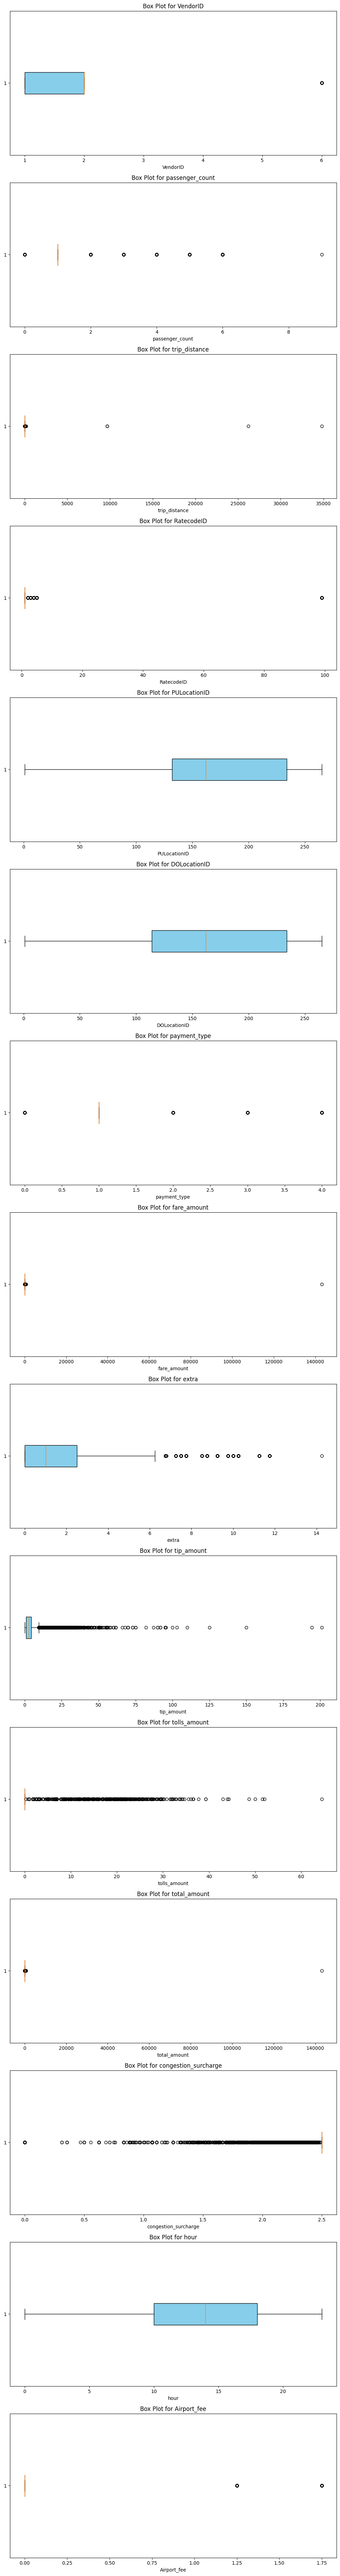

In [ ]:
# Check for potential out of place values in various columns
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns: {list(numerical_columns)}")
print("\nGenerating box plots for numerical columns...")
plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [ ]:
# remove passenger_count > 6
print("\nRemoving rows where 'passenger_count' > 6...")
initial_row_count = len(df)
df = df[df['passenger_count'] <= 6]
final_row_count = len(df)
removed_rows = initial_row_count - final_row_count
print(f"Rows removed: {removed_rows}")


Removing rows where 'passenger_count' > 6...
Rows removed: 1


In [ ]:
# Continue with outlier handling
numerical_columns = ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount']
print(f"Numerical columns: {numerical_columns}")

# Handle outliers using IQR
for col in numerical_columns:
    Q1, Q3 = df[col].quantile([0.25, 0.75])
    IQR = Q3 - Q1
    lower, upper = Q1 - 1.5 * IQR, Q3 + 1.5 * IQR
    print(f"Handling outliers in '{col}' → Lower: {lower}, Upper: {upper}")
    df[col] = df[col].clip(lower, upper)

# Replace negative values with 0
for col in numerical_columns:
    neg_count = (df[col] < 0).sum()
    print(f"Replacing {neg_count} negative values in '{col}' with 0")
    df[col] = df[col].apply(lambda x: max(x, 0))

# Replace payment_type 0 with 2
df['payment_type'] = df['payment_type'].replace(0, 2)

# Remove rows with max RatecodeID
max_ratecode = df['RatecodeID'].max()
print(f"\nRemoving rows where 'RatecodeID' = {max_ratecode}")
before, df = len(df), df[df['RatecodeID'] != max_ratecode]
print(f"Rows removed: {before - len(df)}")


Numerical columns: ['trip_distance', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount']
Handling outliers in 'trip_distance' → Lower: -2.4749999999999996, Upper: 6.924999999999999
Handling outliers in 'fare_amount' → Lower: -9.599999999999998, Upper: 40.8
Handling outliers in 'extra' → Lower: -3.75, Upper: 6.25
Handling outliers in 'tip_amount' → Lower: -4.1000000000000005, Upper: 9.5
Handling outliers in 'tolls_amount' → Lower: 0.0, Upper: 0.0
Handling outliers in 'total_amount' → Lower: -6.025000000000002, Upper: 52.575
Replacing 0 negative values in 'trip_distance' with 0
Replacing 0 negative values in 'fare_amount' with 0
Replacing 0 negative values in 'extra' with 0
Replacing 0 negative values in 'tip_amount' with 0
Replacing 0 negative values in 'tolls_amount' with 0
Replacing 0 negative values in 'total_amount' with 0

Removing rows where 'RatecodeID' = 5.0
Rows removed: 1602


In [ ]:
df['passenger_count'].value_counts()

passenger_count
1.0    216842
2.0     42408
3.0     10547
4.0      6035
0.0      4656
5.0      3680
6.0      2502
Name: count, dtype: int64

Numerical columns: ['VendorID', 'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID', 'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount', 'tolls_amount', 'total_amount', 'congestion_surcharge', 'hour', 'Airport_fee']

Generating box plots for numerical columns...


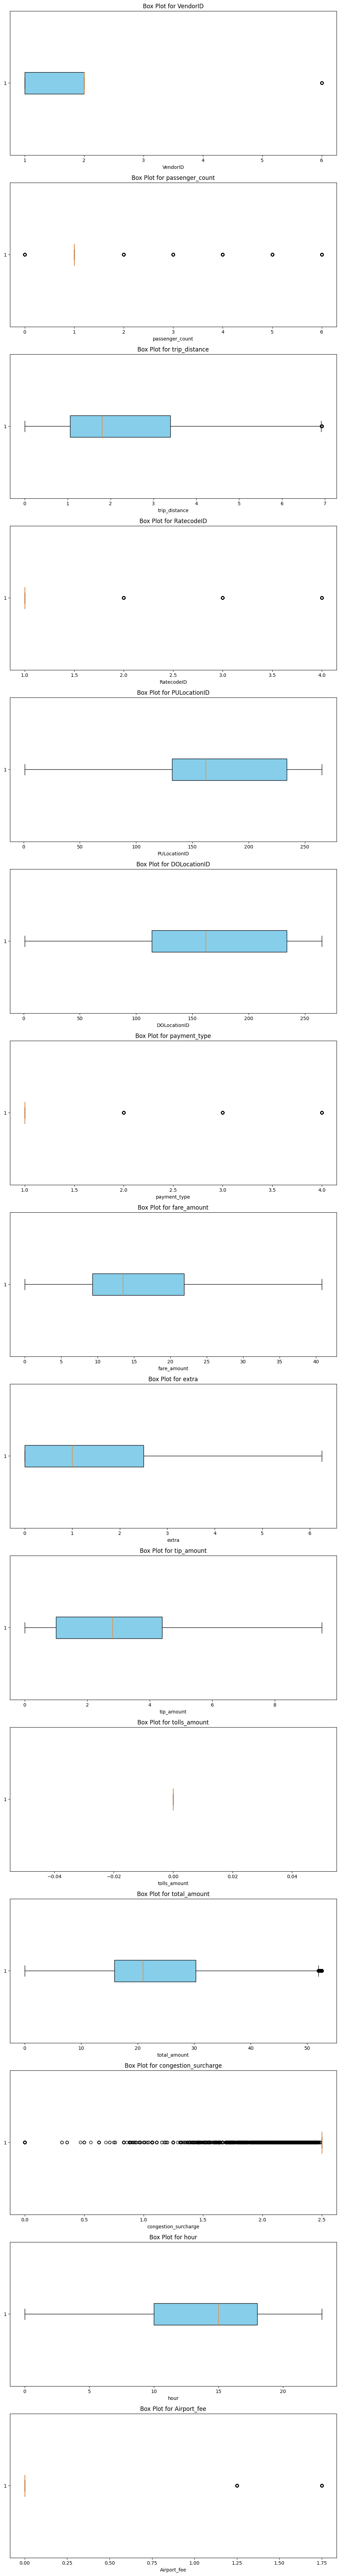

In [ ]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
print(f"Numerical columns: {list(numerical_columns)}")
print("\nGenerating box plots for numerical columns...")
plt.figure(figsize=(10, len(numerical_columns) * 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(len(numerical_columns), 1, i)
    plt.boxplot(df[column].dropna(), vert=False, patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f"Box Plot for {column}")
    plt.xlabel(column)

plt.tight_layout()
plt.show()

In [ ]:
# Do any columns need standardising?

### **No Need of standardization of data**
### Columns like congestion_surcharge, Airport_fee, or extra may already have a fixed range (e.g., between 0 and a few dollars). Standardizing such columns would not add value.
### Payment-related features like fare_amount and tip_amount may already reflect meaningful, interpretable values in specific units (e.g., dollars).
#### Non-standardized values like fare_amount (in dollars) or trip_distance (in miles) are easy to interpret directly. If the ranges of numerical columns are not vastly different, standardization may not be necessary. For example:
#### If most columns have values within reasonable ranges (e.g., trip_distance in miles and fare_amount in dollars), their impact on models may already be balanced.

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [ ]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'tip_amount',
 'tolls_amount',
 'total_amount',
 'congestion_surcharge',
 'date',
 'hour',
 'Airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`:
* `tpep_pickup_datetime`:
* `tpep_dropoff_datetime`:
* `passenger_count`:
* `trip_distance`:
* `RatecodeID`:
* `PULocationID`:
* `DOLocationID`:
* `payment_type`:
* `pickup_hour`:
* `trip_duration`:


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

In [ ]:
pickup_col = 'tpep_pickup_datetime'
dropoff_col = 'tpep_dropoff_datetime'

print("\nExtracting pickup hour, day, month, quarter...")
df['pickup_hour'] = pd.to_datetime(df[pickup_col]).dt.hour
df['pickup_day_of_week'] = pd.to_datetime(df[pickup_col]).dt.day_name()
df['pickup_month'] = pd.to_datetime(df[pickup_col]).dt.month_name()
df['pickup_quarter'] = pd.to_datetime(df[pickup_col]).dt.to_period('Q')
print("Datetime features added successfully.")

print("\nCalculating trip duration (in minutes)...")
df['trip_duration'] = (
    pd.to_datetime(df[dropoff_col]) - pd.to_datetime(df[pickup_col])
).dt.total_seconds() / 60

# Remove trips with non-positive duration or fare
df = df[(df['trip_duration'] > 0) & (df['fare_amount'] > 0)]
print(f"Remaining rows after cleaning: {len(df)}")



Extracting pickup hour, day, month, quarter...
Datetime features added successfully.

Calculating trip duration (in minutes)...
Remaining rows after cleaning: 286489



Calculating hourly pickup trends...


pickup_hour
0      8642
1      5571
2      3713
3      2418
4      1581
5      1749
6      4287
7      8693
8     11944
9     13417
10    14365
11    15606
12    16235
13    16807
14    18098
15    18202
16    17648
17    18530
18    19317
19    16665
20    14698
21    14576
22    13486
23    10241
dtype: int64


Plotting hourly pickup trends...


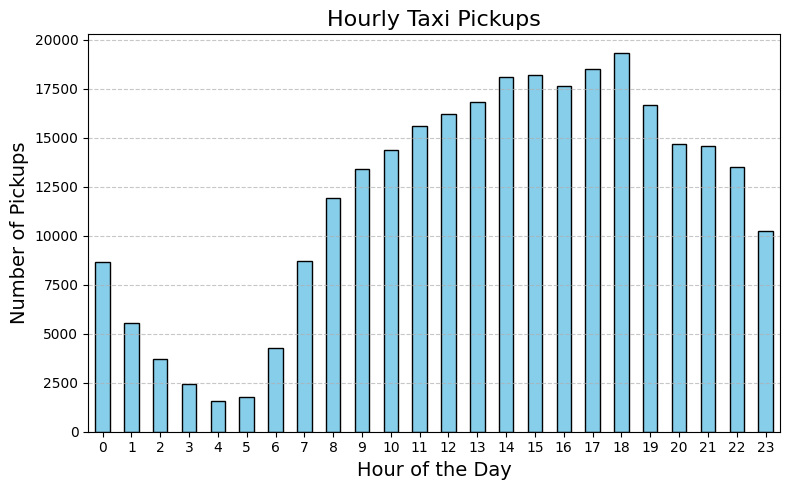

In [ ]:
# Find and show the hourly trends in taxi pickups
print("\nCalculating hourly pickup trends...")
hourly_pickups = df.groupby('pickup_hour').size()
display(hourly_pickups)
print("\nPlotting hourly pickup trends...")
plt.figure(figsize=(8, 5))
hourly_pickups.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Hourly Taxi Pickups', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


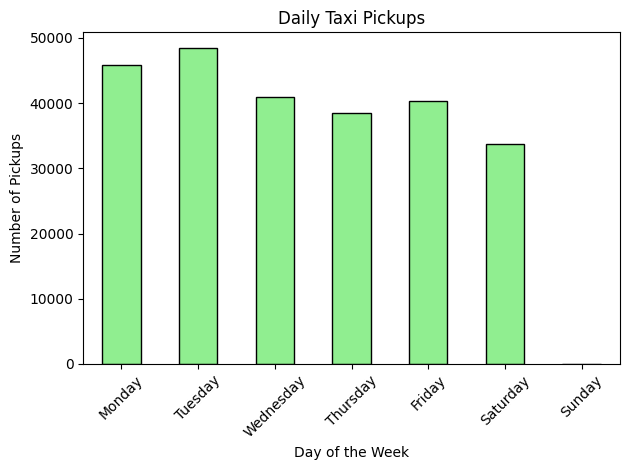

In [ ]:
# Find and show the daily trends in taxi pickups (days of the week)
df['tpep_pickup_datetime'] = pd.to_datetime(df['tpep_pickup_datetime'])
# Extract the day of the week (1=Monday, 2=Tuesday, ..., 7=Sunday)
df['pickup_day_of_week'] = df['tpep_pickup_datetime'].dt.dayofweek
# Map day numbers to day names
day_name_mapping = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday',
                    5: 'Friday', 6: 'Saturday', 7: 'Sunday'}
df['pickup_day_name'] = df['pickup_day_of_week'].map(day_name_mapping)
# Calculate the daily pickups
daily_pickups = df['pickup_day_name'].value_counts().reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)

# Plot the daily pickups
daily_pickups.plot(kind='bar', color='lightgreen', edgecolor='black')
plt.title('Daily Taxi Pickups')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Calculating monthly pickup trends...

Plotting monthly pickup trends...


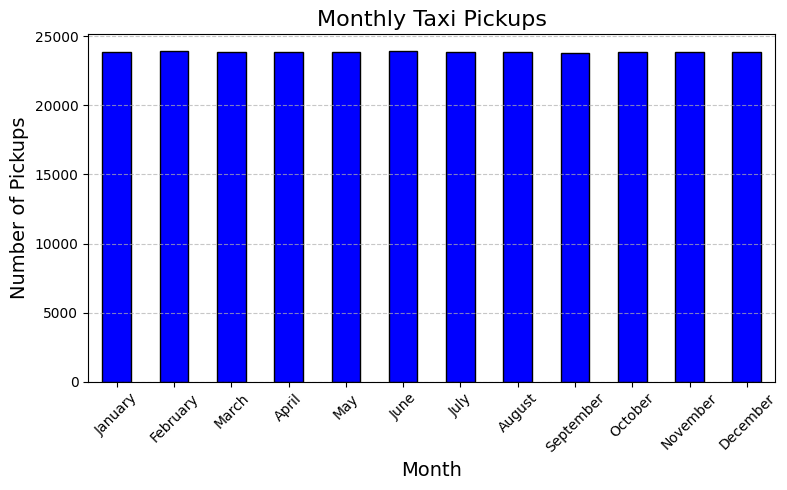

In [ ]:
# Show the monthly trends in pickups
# Extract Month and Count Pickups
print("\nCalculating monthly pickup trends...")
monthly_pickups = df['pickup_month'].value_counts()
monthly_pickups = monthly_pickups.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
print("\nPlotting monthly pickup trends...")
plt.figure(figsize=(8, 5))
monthly_pickups.plot(kind='bar', color='blue', edgecolor='black')
plt.title('Monthly Taxi Pickups', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Number of Pickups', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [ ]:
# Analyse the above parameters

financial_columns = ['fare_amount', 'tip_amount', 'total_amount', 'trip_distance']
df[financial_columns].describe()

fare_amount     tip_amount   total_amount  trip_distance
count  286489.000000  286489.000000  286489.000000  286489.000000
mean       17.210669       3.140747      25.151830       2.594827
std        10.855678       2.728074      12.842871       2.111069
min         0.460000       0.000000       4.000000       0.000000
25%         9.300000       1.000000      15.860000       1.060000
50%        13.500000       2.800000      21.000000       1.800000
75%        21.900000       4.400000      30.300000       3.400000
max        40.800000       9.500000      52.575000       6.925000

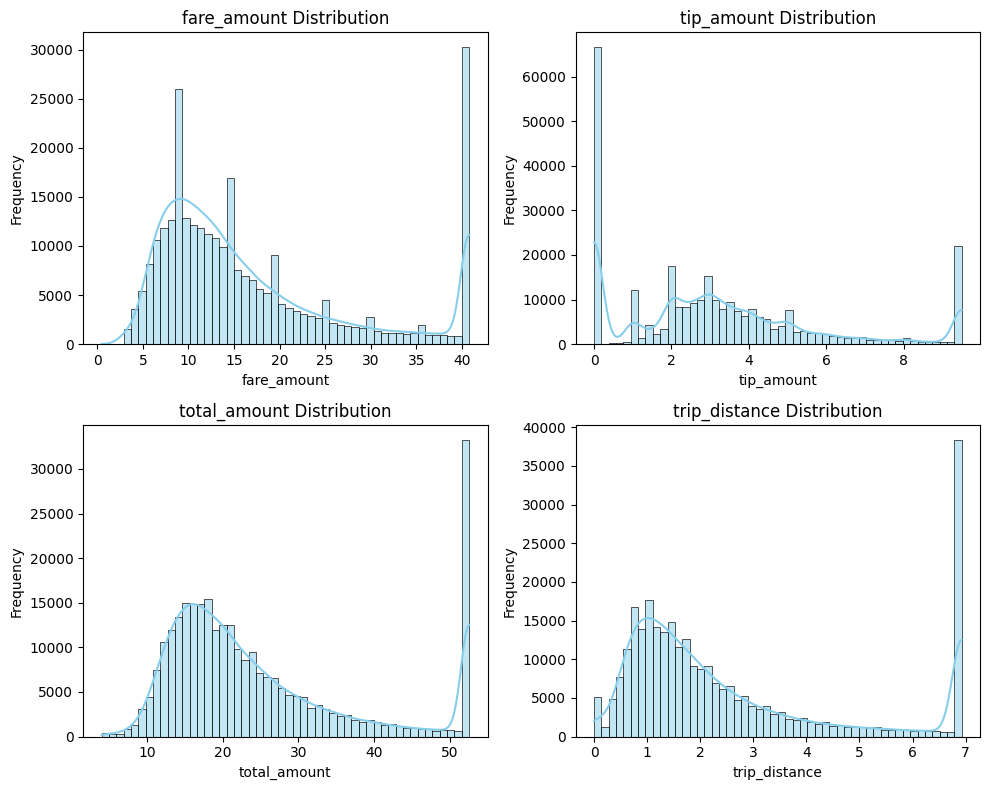

In [ ]:
plt.figure(figsize=(10, 8))

for i, col in enumerate(financial_columns, 1):
  plt.subplot(2, 2, i)
  sns.histplot(df[col], bins=50, kde=True, color='skyblue')
  plt.title(f'{col} Distribution')
  plt.xlabel(col)
  plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [ ]:
# Create a df with non zero entries for the selected parameters.
columns_to_check = ['trip_distance', 'fare_amount', 'tip_amount', 'total_amount']
filtered_data = df[(df[columns_to_check] != 0).all(axis=1)]
print(f"Number of rows before filtering: {len(df)}")
print(f"Number of rows after filtering: {len(filtered_data)}")
filtered_data

Number of rows before filtering: 286489
Number of rows after filtering: 219701


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0              2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1              2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2              2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
4              2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   
5              1  2023-01-01 10:53:55   2023-01-01 10:58:38              2.0   
...          ...                  ...                   ...              ...   
289986         1  2023-09-03 13:04:02   2023-09-03 13:16:30              1.0   
289987         1  2023-09-05 07:34:59   2023-09-05 07:51:54              1.0   
289988         1  2023-09-06 13:06:00   2023-09-06 13:13:10              1.0   
289989         1  2023-09-01 11:22:01   2023-09-01 11:55:24              1.0   
289991         1  2023-09-05 18:34:20   2023-09-05 18:57:56              2.0   

        trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0               5.120         1.0           114           142             1   
1               6.925         1.0           244           137             1   
2               3.790         1.0           107           262             1   
4               6.925         1.0           138           237             1   
5               1.200         1.0           163           186             1   
...               ...         ...           ...           ...           ...   
289986          2.100         1.0           107           232             1   
289987          6.300         1.0           238           231             1   
289988          1.200         1.0           237            43             2   
289989          6.925         1.0            68            42             1   
289991          3.100         1.0           163           211             1   

        fare_amount  ...  congestion_surcharge        date  hour  Airport_fee  \
0              28.9  ...              2.500000  2023-01-02    21          0.0   
1              40.8  ...              2.500000  2023-01-06     8          0.0   
2              17.0  ...              2.500000  2023-01-01    22          0.0   
4              40.8  ...              2.500000  2023-01-03    16          0.0   
5               7.2  ...              2.500000  2023-01-01    10          0.0   
...             ...  ...                   ...         ...   ...          ...   
289986         13.5  ...              2.500000  2023-09-03    13          0.0   
289987         27.5  ...              2.500000  2023-09-05     7          0.0   
289988          9.3  ...              2.424202  2023-09-06    13          0.0   
289989         38.7  ...              2.500000  2023-09-01    11          0.0   
289991         21.2  ...              2.500000  2023-09-05    18          0.0   

        pickup_hour pickup_day_of_week  pickup_month  pickup_quarter  \
0                21                  0       January          2023Q1   
1                 8                  4       January          2023Q1   
2                22                  6       January          2023Q1   
4                16                  1       January          2023Q1   
5                10                  6       January          2023Q1   
...             ...                ...           ...             ...   
289986           13                  6     September          2023Q3   
289987            7                  1     September          2023Q3   
289988           13                  2     September          2023Q3   
289989           11                  4     September          2023Q3   
289991           18                  1     September          2023Q3   

        trip_duration  pickup_day_name  
0           28.883333              NaN  
1           35.983333         Thursday  
2           10.966667         Saturday  
4           32.583333           Monday  
5            4.716667         Saturday  
...           

**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend


Calculating monthly revenue...

Monthly Revenue:
pickup_month
January      596880.130
February     566739.580
March        590550.330
April        589564.050
May          612786.475
June         609832.715
July         595161.790
August       601144.155
September    609637.000
October      616810.260
November     608919.800
December     607696.230
Name: total_amount, dtype: float64

Plotting monthly revenue...


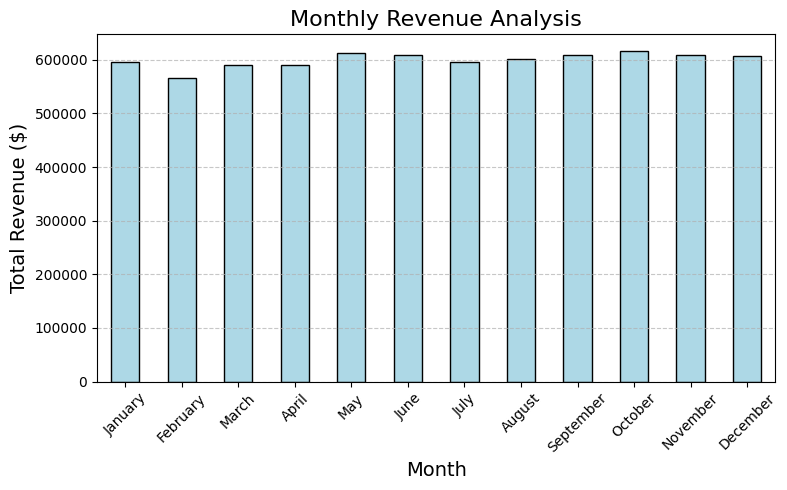

In [ ]:
# # Group data by month and analyse monthly revenue
print("\nCalculating monthly revenue...")
monthly_revenue = df.groupby('pickup_month')['total_amount'].sum()
monthly_revenue = monthly_revenue.reindex(
    ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']
)
print("\nMonthly Revenue:")
print(monthly_revenue)
print("\nPlotting monthly revenue...")
plt.figure(figsize=(8, 5))
monthly_revenue.plot(kind='bar', color='lightblue', edgecolor='black')
plt.title('Monthly Revenue Analysis', fontsize=16)
plt.xlabel('Month', fontsize=14)
plt.ylabel('Total Revenue ($)', fontsize=14)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue


Calculating total revenue for each quarter...

Calculating the proportion of each quarter...

Quarterly Revenue:
pickup_quarter
2022Q4         13.500
2023Q1    1754170.040
2023Q2    1812183.240
2023Q3    1805942.945
2023Q4    1833412.790
Freq: Q-DEC, Name: total_amount, dtype: float64

Proportion of Each Quarter:
pickup_quarter
2022Q4     0.000187
2023Q1    24.344124
2023Q2    25.149223
2023Q3    25.062621
2023Q4    25.443844
Freq: Q-DEC, Name: total_amount, dtype: float64

Plotting quarterly proportions...


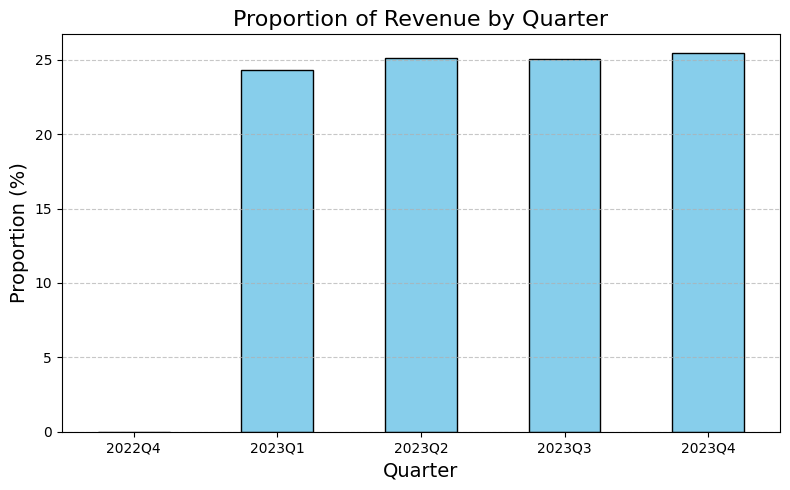

In [ ]:
# Calculate proportion of each quarter
print("\nCalculating total revenue for each quarter...")
quarterly_revenue = df.groupby('pickup_quarter')['total_amount'].sum()

print("\nCalculating the proportion of each quarter...")
total_revenue = quarterly_revenue.sum()
quarterly_proportion = (quarterly_revenue / total_revenue) * 100

print("\nQuarterly Revenue:")
print(quarterly_revenue)
print("\nProportion of Each Quarter:")
print(quarterly_proportion)
print("\nPlotting quarterly proportions...")
plt.figure(figsize=(8, 5))
quarterly_proportion.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Proportion of Revenue by Quarter', fontsize=16)
plt.xlabel('Quarter', fontsize=14)
plt.ylabel('Proportion (%)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0


Calculating correlation between trip distance and fare amount...
Correlation: 0.94

Plotting scatterplot...


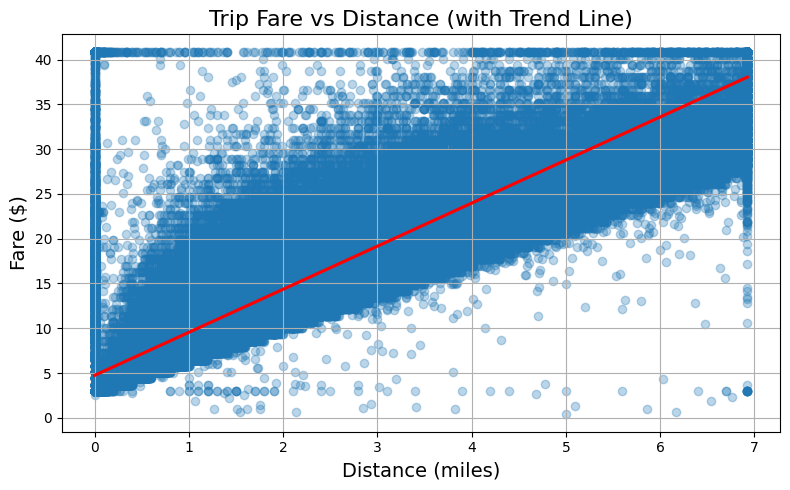

In [ ]:
# Show how trip fare is affected by distance
print("\nCalculating correlation between trip distance and fare amount...")
correlation = df['trip_distance'].corr(df['fare_amount'])
print(f"Correlation: {correlation:.2f}")

print("\nPlotting scatterplot...")
plt.figure(figsize=(8, 5))
sns.regplot(data=df, x='trip_distance', y='fare_amount', scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Trip Fare vs Distance (with Trend Line)', fontsize=16)
plt.xlabel('Distance (miles)', fontsize=14)
plt.ylabel('Fare ($)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()


**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1         2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2         2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3         2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4         2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          5.120         1.0           114           142             1   
1          6.925         1.0           244           137             1   
2          3.790         1.0           107           262             1   
3          0.720         1.0           170           233             2   
4          6.925         1.0           138           237             1   

   fare_amount  ...  congestion_surcharge        date  hour  Airport_fee  \
0         28.9  ...                   2.5  2023-01-02    21          0.0   
1         40.8  ...                   2.5  2023-01-06     8          0.0   
2         17.0  ...                   2.5  2023-01-01    22          0.0   
3          7.9  ...                   2.5  2023-01-05    22          0.0   
4         40.8  ...                   2.5  2023-01-03    16          0.0   

   pickup_hour pickup_day_of_week  pickup_month  pickup_quarter  \
0           21                  0       January          2023Q1   
1            8                  4       January          2023Q1   
2           22                  6       January          2023Q1   
3           22                  3       January          2023Q1   
4           16                  1       January          2023Q1   

   trip_duration  pickup_day_name  
0      28.883333              NaN  
1      35.983333         Thursday  
2      10.966667         Saturday  
3       6.750000        Wednesday  
4      32.583333           Monday  

[5 rows x 24 columns]


Calculating correlation between trip duration and fare amount...
Correlation: 0.28

Plotting scatterplot with regression line...


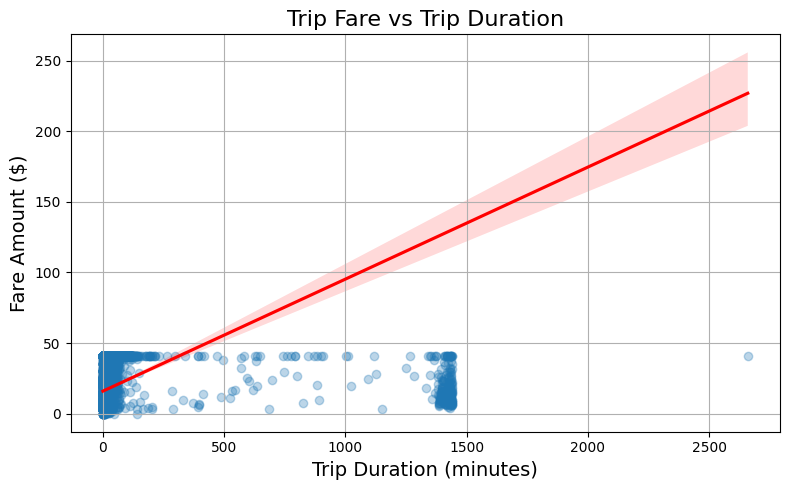

In [ ]:
# Show relationship between fare and trip duration
print("\nCalculating correlation between trip duration and fare amount...")
correlation = df['trip_duration'].corr(df['fare_amount'])
print(f"Correlation: {correlation:.2f}")
print("\nPlotting scatterplot with regression line...")
plt.figure(figsize=(8, 5))
sns.regplot(x='trip_duration', y='fare_amount', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Trip Fare vs Trip Duration', fontsize=16)
plt.xlabel('Trip Duration (minutes)', fontsize=14)
plt.ylabel('Fare Amount ($)', fontsize=14)
plt.grid(True)
plt.tight_layout()
plt.show()



Calculating correlation between passenger count and fare amount...
Correlation Coefficient: 0.04

Plotting bar chart for average fare by passenger count...


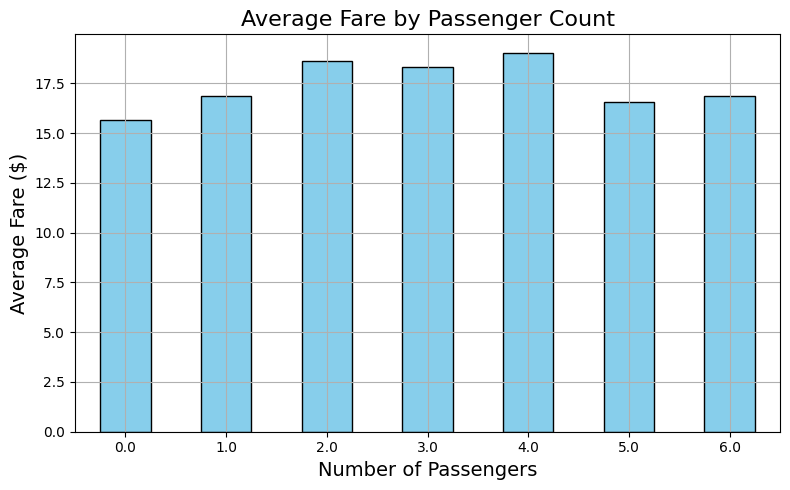

In [ ]:
# Show relationship between fare and number of passengers
print("\nCalculating correlation between passenger count and fare amount...")
correlation = df['passenger_count'].corr(df['fare_amount'])
print(f"Correlation Coefficient: {correlation:.2f}")

print("\nPlotting bar chart for average fare by passenger count...")
avg_fare_per_passenger = df.groupby('passenger_count')['fare_amount'].mean()
plt.figure(figsize=(8, 5))
avg_fare_per_passenger.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Average Fare by Passenger Count', fontsize=16)
plt.xlabel('Number of Passengers', fontsize=14)
plt.ylabel('Average Fare ($)', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



Calculating correlation between tip amount and trip distance...
Correlation Coefficient: 0.55

Plotting scatterplot with regression line...


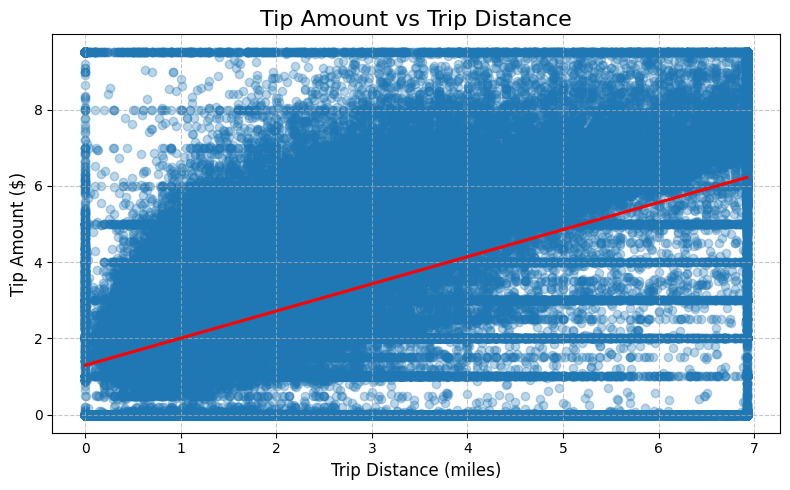

In [ ]:
# Show relationship between tip and trip distance
print("\nCalculating correlation between tip amount and trip distance...")
correlation = df['trip_distance'].corr(df['tip_amount'])
print(f"Correlation Coefficient: {correlation:.2f}")
print("\nPlotting scatterplot with regression line...")
plt.figure(figsize=(8, 5))
sns.regplot(x='trip_distance', y='tip_amount', data=df, scatter_kws={'alpha': 0.3}, line_kws={'color': 'red'})
plt.title('Tip Amount vs Trip Distance', fontsize=16)
plt.xlabel('Trip Distance (miles)', fontsize=12)
plt.ylabel('Tip Amount ($)', fontsize=12)
plt.grid(axis='both', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)


Calculating the distribution of payment types...

Payment Type Distribution (Counts):
payment_type
1    223743
2     59276
4      2081
3      1389
Name: count, dtype: int64

Payment Type Distribution (Percentage):
payment_type
1    78.098286
2    20.690498
4     0.726380
3     0.484835
Name: proportion, dtype: float64

Plotting bar chart for payment type distribution...


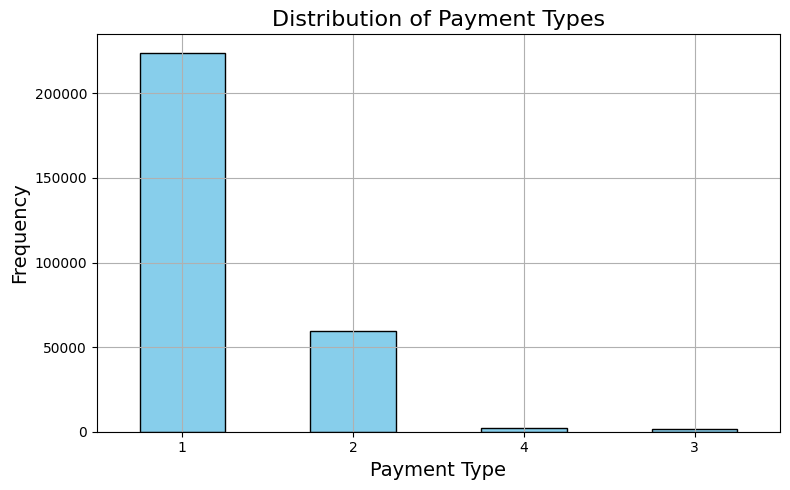


Plotting pie chart for payment type distribution...


In [ ]:
# Analyse the distribution of different payment types (payment_type).
print("\nCalculating the distribution of payment types...")
payment_type_distribution = df['payment_type'].value_counts()
payment_type_percentage = df['payment_type'].value_counts(normalize=True) * 100
print("\nPayment Type Distribution (Counts):")
print(payment_type_distribution)
print("\nPayment Type Distribution (Percentage):")
print(payment_type_percentage)

print("\nPlotting bar chart for payment type distribution...")
plt.figure(figsize=(8, 5))
payment_type_distribution.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Distribution of Payment Types', fontsize=16)
plt.xlabel('Payment Type', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()

print("\nPlotting pie chart for payment type distribution...")
payment_type_distribution.index = payment_type_distribution.index.map({
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute'
})
plt.figure(figsize=(8, 5))
payment_type_distribution.plot(kind='pie', autopct='%1.1f%%', startangle=140, colormap='viridis', fontsize=12)
plt.title('Proportion of Payment Types', fontsize=16)
plt.ylabel('')
plt.tight_layout()
plt.show()



- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [ ]:
!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [ ]:
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file('/content/drive/MyDrive/Aditya_Upgrad_EDA_Assignment/Datasets and Dictionary-NYC/Datasets and Dictionary/taxi_zones/taxi_zones.shp')# read the .shp file using gpd

Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

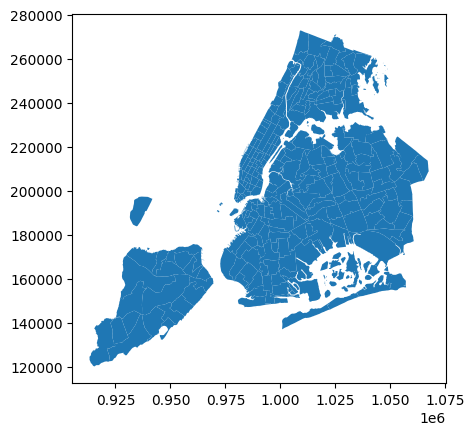

In [ ]:
print(zones.info())
zones.plot()

In [ ]:
zones.head()

OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0         1    0.116357    0.000782           Newark Airport           1   
1         2    0.433470    0.004866              Jamaica Bay           2   
2         3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3         4    0.043567    0.000112            Alphabet City           4   
4         5    0.092146    0.000498            Arden Heights           5   

         borough                                           geometry  
0            EWR  POLYGON ((933100.918 192536.086, 933091.011 19...  
1         Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...  
2          Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...  
3      Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...  
4  Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [ ]:
# Merge zones and trip records using locationID and PULocationID
print("\nRenaming locationID column in taxi_zones to match PULocationID in FinalData...")
zones = zones.rename(columns={'LocationID': 'PULocationID'})
print("\nMerging FinalData and taxi_zones on PULocationID...")
merged_data = pd.merge(df, zones, on='PULocationID', how='inner')
print(f"Merge completed successfully! The merged dataset has {len(merged_data)} rows.")
print("\nFirst 5 rows of the merged dataset:")
merged_data.head()


Renaming locationID column in taxi_zones to match PULocationID in FinalData...

Merging FinalData and taxi_zones on PULocationID...
Merge completed successfully! The merged dataset has 283565 rows.

First 5 rows of the merged dataset:


VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1         2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2         2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3         2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4         2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          5.120         1.0           114           142             1   
1          6.925         1.0           244           137             1   
2          3.790         1.0           107           262             1   
3          0.720         1.0           170           233             2   
4          6.925         1.0           138           237             1   

   fare_amount  ...  pickup_month  pickup_quarter  trip_duration  \
0         28.9  ...       January          2023Q1      28.883333   
1         40.8  ...       January          2023Q1      35.983333   
2         17.0  ...       January          2023Q1      10.966667   
3          7.9  ...       January          2023Q1       6.750000   
4         40.8  ...       January          2023Q1      32.583333   

   pickup_day_name  OBJECTID Shape_Leng  Shape_Area                      zone  \
0              NaN       114   0.031727    0.000047   Greenwich Village South   
1         Thursday       244   0.080569    0.000360  Washington Heights South   
2         Saturday       107   0.038041    0.000075                  Gramercy   
3        Wednesday       170   0.045769    0.000074               Murray Hill   
4           Monday       138   0.107467    0.000537         LaGuardia Airport   

     borough                                           geometry  
0  Manhattan  POLYGON ((986306.712 203122.786, 986300.242 20...  
1  Manhattan  POLYGON ((1000658.69 249440.205, 1000658.74 24...  
2  Manhattan  POLYGON ((989131.643 205749.904, 989084.531 20...  
3  Manhattan  POLYGON ((991999.299 210994.739, 991972.635 21...  
4     Queens  MULTIPOLYGON (((1019904.219 225677.983, 102031...  

[5 rows x 30 columns]

In [ ]:
df.columns

Index(['VendorID', 'tpep_pickup_datetime', 'tpep_dropoff_datetime',
       'passenger_count', 'trip_distance', 'RatecodeID', 'PULocationID',
       'DOLocationID', 'payment_type', 'fare_amount', 'extra', 'tip_amount',
       'tolls_amount', 'total_amount', 'congestion_surcharge', 'date', 'hour',
       'Airport_fee', 'pickup_hour', 'pickup_day_of_week', 'pickup_month',
       'pickup_quarter', 'trip_duration', 'pickup_day_name'],
      dtype='object')

**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [ ]:
# Group data by location and calculate the number of trips
print("\nGrouping data by location and calculating the number of trips...")
grouped_data = merged_data.groupby(['PULocationID', 'zone']).size().reset_index(name='Number_of_Trips')
print("\nGrouped Data (first 10 rows):")
display(grouped_data)
grouped_data.info()


Grouping data by location and calculating the number of trips...

Grouped Data (first 10 rows):


PULocationID                     zone  Number_of_Trips
0               1           Newark Airport                5
1               3  Allerton/Pelham Gardens                1
2               4            Alphabet City              323
3               6  Arrochar/Fort Wadsworth                3
4               7                  Astoria              154
..            ...                      ...              ...
218           259       Woodlawn/Wakefield                2
219           260                 Woodside               52
220           261       World Trade Center             1618
221           262           Yorkville East             3946
222           263           Yorkville West             5401

[223 rows x 3 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 223 entries, 0 to 222
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   PULocationID     223 non-null    int64 
 1   zone             223 non-null    object
 2   Number_of_Trips  223 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 5.4+ KB


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [ ]:
# Merge trip counts back to the zones GeoDataFrame
print("\nMerging trip counts into the taxi_zones GeoDataFrame...")
zones = zones.merge(grouped_data[['PULocationID', 'Number_of_Trips']], on='PULocationID', how='left')
zones['Number_of_Trips'] = zones['Number_of_Trips'].fillna(0).astype(int)
print("\nRenaming PULocationID to LocationID...")
zones.rename(columns={'PULocationID': 'LocationID'}, inplace=True)
print("\nFirst 5 rows of the updated GeoDataFrame with trip counts:")
display(zones)


Merging trip counts into the taxi_zones GeoDataFrame...

Renaming PULocationID to LocationID...

First 5 rows of the updated GeoDataFrame with trip counts:


OBJECTID  Shape_Leng  Shape_Area                     zone  LocationID  \
0           1    0.116357    0.000782           Newark Airport           1   
1           2    0.433470    0.004866              Jamaica Bay           2   
2           3    0.084341    0.000314  Allerton/Pelham Gardens           3   
3           4    0.043567    0.000112            Alphabet City           4   
4           5    0.092146    0.000498            Arden Heights           5   
..        ...         ...         ...                      ...         ...   
258       259    0.126750    0.000395       Woodlawn/Wakefield         259   
259       260    0.133514    0.000422                 Woodside         260   
260       261    0.027120    0.000034       World Trade Center         261   
261       262    0.049064    0.000122           Yorkville East         262   
262       263    0.037017    0.000066           Yorkville West         263   

           borough                                           geometry  \
0              EWR  POLYGON ((933100.918 192536.086, 933091.011 19...   
1           Queens  MULTIPOLYGON (((1033269.244 172126.008, 103343...   
2            Bronx  POLYGON ((1026308.77 256767.698, 1026495.593 2...   
3        Manhattan  POLYGON ((992073.467 203714.076, 992068.667 20...   
4    Staten Island  POLYGON ((935843.31 144283.336, 936046.565 144...   
..             ...                                                ...   
258          Bronx  POLYGON ((1025414.782 270986.139, 1025138.624 ...   
259         Queens  POLYGON ((1011466.966 216463.005, 1011545.889 ...   
260      Manhattan  POLYGON ((980555.204 196138.486, 980570.792 19...   
261      Manhattan  MULTIPOLYGON (((999804.795 224498.527, 999824....   
262      Manhattan  POLYGON ((997493.323 220912.386, 997355.264 22...   

     Number_of_Trips  
0                  5  
1                  0  
2                  1  
3                323  
4                  0  
..               ...  
258                2  
259               52  
260             1618  
261             3946  
262             5401  

[263 rows x 8 columns]

The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

Figure - It represents the entire window where your plots are drawn.
axis - It refers to the actual plot area (a single chart inside the figure.
fig, ax = plt.subplots(1, 1, figsize = (12, 10))

Creating a Map...


<Figure size 1400x1000 with 0 Axes>

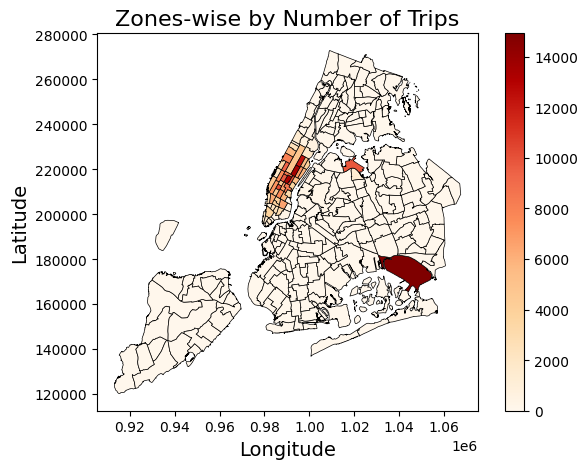

In [ ]:
# Define figure and axis
print('Figure - It represents the entire window where your plots are drawn.')
print('axis - It refers to the actual plot area (a single chart inside the figure.')
print('fig, ax = plt.subplots(1, 1, figsize = (12, 10))')

# Plot the map and display it
print("\nCreating a Map...")
plt.figure(figsize=(14, 10))
zones.plot(
    column='Number_of_Trips',
    cmap='OrRd',
    legend=True,
    edgecolor='black',
    linewidth=0.5
)
plt.title('Zones-wise by Number of Trips', fontsize=16)
plt.xlabel('Longitude', fontsize=14)
plt.ylabel('Latitude', fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# can you try displaying the zones DF sorted by the number of trips?
sorted_taxi_zones = zones.sort_values(by='Number_of_Trips', ascending=False)
sorted_taxi_zones

OBJECTID  Shape_Leng  Shape_Area                          zone  \
131       132    0.245479    0.002038                   JFK Airport   
236       237    0.042213    0.000096         Upper East Side South   
160       161    0.035804    0.000072                Midtown Center   
235       236    0.044252    0.000103         Upper East Side North   
185       186    0.024696    0.000037  Penn Station/Madison Sq West   
..        ...         ...         ...                           ...   
220       221    0.166218    0.000890                     Stapleton   
29         30    0.094510    0.000146                 Broad Channel   
30         31    0.096425    0.000334                    Bronx Park   
22         23    0.290556    0.002196       Bloomfield/Emerson Hill   
1           2    0.433470    0.004866                   Jamaica Bay   

     LocationID        borough  \
131         132         Queens   
236         237      Manhattan   
160         161      Manhattan   
235         236      Manhattan   
185         186      Manhattan   
..          ...            ...   
220         221  Staten Island   
29           30         Queens   
30           31          Bronx   
22           23  Staten Island   
1             2         Queens   

                                              geometry  Number_of_Trips  
131  MULTIPOLYGON (((1032791.001 181085.006, 103283...            14922  
236  POLYGON ((993633.442 216961.016, 993507.232 21...            13578  
160  POLYGON ((991081.026 214453.698, 990952.644 21...            13380  
235  POLYGON ((995940.048 221122.92, 995812.322 220...            12303  
185  POLYGON ((986752.603 210853.699, 986627.863 21...            10197  
..                                                 ...              ...  
220  POLYGON ((963349.728 171627.581, 963397.759 17...                0  
29   POLYGON ((1034013.272 163473.152, 1034866.459 ...                0  
30   POLYGON ((1019950.154 251628.997, 1019950.288 ...                0  
22   POLYGON ((929937.155 170690.809, 929967.456 17...                0  
1    MULTIPOLYGON (((1033269.244 172126.008, 103343...                0  

[263 rows x 8 columns]

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [ ]:
df.head()

VendorID tpep_pickup_datetime tpep_dropoff_datetime  passenger_count  \
0         2  2023-01-02 21:59:09   2023-01-02 22:28:02              1.0   
1         2  2023-01-06 08:16:08   2023-01-06 08:52:07              1.0   
2         2  2023-01-01 22:40:31   2023-01-01 22:51:29              1.0   
3         2  2023-01-05 22:33:03   2023-01-05 22:39:48              2.0   
4         2  2023-01-03 16:35:28   2023-01-03 17:08:03              1.0   

   trip_distance  RatecodeID  PULocationID  DOLocationID  payment_type  \
0          5.120         1.0           114           142             1   
1          6.925         1.0           244           137             1   
2          3.790         1.0           107           262             1   
3          0.720         1.0           170           233             2   
4          6.925         1.0           138           237             1   

   fare_amount  ...  congestion_surcharge        date  hour  Airport_fee  \
0         28.9  ...                   2.5  2023-01-02    21          0.0   
1         40.8  ...                   2.5  2023-01-06     8          0.0   
2         17.0  ...                   2.5  2023-01-01    22          0.0   
3          7.9  ...                   2.5  2023-01-05    22          0.0   
4         40.8  ...                   2.5  2023-01-03    16          0.0   

   pickup_hour pickup_day_of_week  pickup_month  pickup_quarter  \
0           21                  0       January          2023Q1   
1            8                  4       January          2023Q1   
2           22                  6       January          2023Q1   
3           22                  3       January          2023Q1   
4           16                  1       January          2023Q1   

   trip_duration  pickup_day_name  
0      28.883333              NaN  
1      35.983333         Thursday  
2      10.966667         Saturday  
3       6.750000        Wednesday  
4      32.583333           Monday  

[5 rows x 24 columns]


Calculating the average trip duration and distance for each route and hour...

Calculating speed in mph for each route and hour...

Identifying slow routes...

Top 10 slow routes (in mph):


PULocationID  DOLocationID  pickup_hour  average_trip_duration  \
46698           226           226           11               0.183333   
49660           231            71           11              49.350000   
46218           218           231            8              75.150000   
9891             76           189           13              28.700000   
9889             76           170            8              59.283333   
9888             76           132           17              13.333333   
8942             74            74            4               5.983333   
8940             74            74            1               0.933333   
8939             74            74            0               0.216667   
45155           209           231           17               2.733333   

       average_distance  speed_mph  
46698               0.0        0.0  
49660               0.0        0.0  
46218               0.0        0.0  
9891                0.0        0.0  
9889                0.0        0.0  
9888                0.0        0.0  
8942                0.0        0.0  
8940                0.0        0.0  
8939                0.0        0.0  
45155               0.0        0.0

<Axes: >

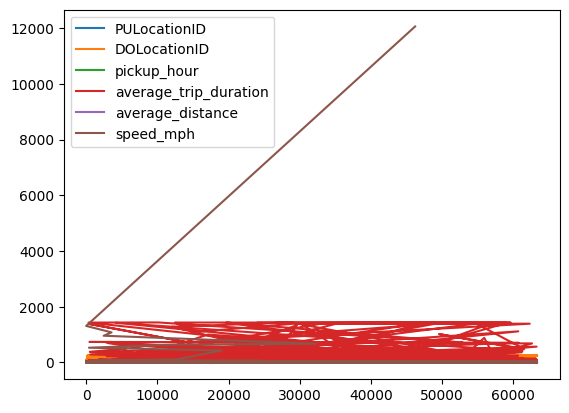

In [ ]:
# Find routes which have the slowest speeds at different times of the day
print("\nCalculating the average trip duration and distance for each route and hour...")
route_hour_grouped = merged_data.groupby(['PULocationID', 'DOLocationID', 'pickup_hour']).agg(
    average_trip_duration=('trip_duration', 'mean'),
    average_distance=('trip_distance', 'mean')
).reset_index()
print("\nCalculating speed in mph for each route and hour...")
route_hour_grouped['speed_mph'] = (route_hour_grouped['average_distance'] / route_hour_grouped['average_trip_duration']) * 60
print("\nIdentifying slow routes...")
slow_routes = route_hour_grouped.sort_values(by='speed_mph', ascending=True)
print("\nTop 10 slow routes (in mph):")
display(slow_routes.head(10))
slow_routes.plot()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [ ]:
# Visualise the number of trips per hour and find the busiest hour
print("\nCounting the number of trips for each hour of the day...")
hourly_trip_counts = merged_data['pickup_hour'].value_counts().sort_index()
print("\nIdentifying the busiest hour...")
busiest_hour = hourly_trip_counts.idxmax()
busiest_hour_trips = hourly_trip_counts.max()
print(f"The busiest hour is {busiest_hour}:00 with {busiest_hour_trips} trips.")
print("\nVisualizing the number of trips at each hour...")
plt.figure(figsize=(8, 5))
hourly_trip_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Trips at Each Hour of the Day', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=14)
plt.ylabel('Number of Trips', fontsize=14)
plt.xticks(rotation=0)
plt.grid(True)
plt.tight_layout()
plt.show()



Counting the number of trips for each hour of the day...

Identifying the busiest hour...
The busiest hour is 18:00 with 19084 trips.

Visualizing the number of trips at each hour...


Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [ ]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = len(merged_data)/289992
print("\nCounting the number of trips for each hour of the day...")
hourly_trip_counts = merged_data['pickup_hour'].value_counts().sort_values(ascending=False)
print("\nIdentifying the five busiest hours...")
busiest_hours = hourly_trip_counts.head(5)
print("\nThe five busiest hours and their respective trip counts are fo ppulation is:")
print(busiest_hours/sample_fraction)





Counting the number of trips for each hour of the day...

Identifying the five busiest hours...

The five busiest hours and their respective trip counts are fo ppulation is:
pickup_hour
18    19516.538811
17    18723.973438
15    18418.196604
14    18316.952769
16    17872.093495
Name: count, dtype: float64


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

In [ ]:
# Compare traffic trends for the week days and weekends
weekdays = [1,2,3,4,5]
weekends = [6,0]
weekday_data = merged_data[merged_data['pickup_day_of_week'].isin(weekdays)]
weekend_data = merged_data[merged_data['pickup_day_of_week'].isin(weekends)]
metrics_df = pd.DataFrame({
    'Total Trips': [len(weekday_data), len(weekend_data)],
}, index=['Weekdays', 'Weekends'])
# Plot
metrics_df.plot(kind='bar', figsize=(8, 5), color=['skyblue', 'orange'], edgecolor='black')
plt.title('Weekdays vs Weekends: Traffic Comparison')
plt.ylabel('Value')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

Inferences from the Patterns
Weekday vs Weekend Trip Volume:
Weekdays have significantly more trips (179,422) compared to weekends (72,394).
This suggests that taxi services are more in demand on weekdays, likely due to:
Work commutes
Business activities
Other weekday-specific routines
Average Trip Duration:
Weekday trips have a slightly higher average duration (17.14 minutes) compared to weekend trips (16.18 minutes).
Possible reasons:
Heavier traffic during weekdays, especially during rush hours.
Longer travel times due to work-related trips.
Average Trip Distance:
Weekend trips have a marginally higher average distance (3.11 miles vs. 3.06 miles).
Possible reasons:
Leisure activities during weekends, where people may travel farther for:
Shopping
Dining
Entertainment
Less traffic on weekends, allowing for smoother and longer trips.

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [ ]:
# Find top 10 pickup and dropoff zones
# Finding the top 10 pickup zones
top_pickup_zones = (
    merged_data['PULocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'ZoneID', 'PULocationID': 'Pickup Count'})
)

# Finding the top 10 dropoff zones
top_dropoff_zones = (
    merged_data['DOLocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'ZoneID', 'DOLocationID': 'Dropoff Count'})
)
print("\nTop 10 Pickup Zones:")
print(top_pickup_zones)
print("\nTop 10 Dropoff Zones:")
print(top_dropoff_zones)



Top 10 Pickup Zones:
   Pickup Count  count
0           132  14922
1           237  13578
2           161  13380
3           236  12303
4           186  10197
5           162  10182
6           138   9823
7           230   9655
8           142   9355
9           170   8414

Top 10 Dropoff Zones:
   Dropoff Count  count
0            236  12826
1            237  12130
2            161  11572
3            230   9081
4            170   8476
5            162   8333
6            239   8112
7            142   7984
8            141   7457
9             68   7248


**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [ ]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
pickup_counts = merged_data['PULocationID'].value_counts()
dropoff_counts = merged_data['DOLocationID'].value_counts()
zone_ratios = pd.DataFrame({
    'pickup_count': pickup_counts,
    'dropoff_count': dropoff_counts
}).fillna(0)
zone_ratios['pickup_dropoff_ratio'] = zone_ratios['pickup_count'] / (zone_ratios['dropoff_count'] + 1e-6)
highest_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=False).head(10)
lowest_ratios = zone_ratios.sort_values(by='pickup_dropoff_ratio', ascending=True).head(10)
print("Top 10 Zones with Highest Pickup/Dropoff Ratios:\n", highest_ratios)
print("\nTop 10 Zones with Lowest Pickup/Dropoff Ratios:\n", lowest_ratios)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
highest_ratios['pickup_dropoff_ratio'].plot(kind='bar', color='blue')
plt.title('Top 10 Highest Pickup/Dropoff Ratios')
plt.xlabel('Zone')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=0)
plt.subplot(1, 2, 2)
lowest_ratios['pickup_dropoff_ratio'].plot(kind='bar', color='red')
plt.title('Top 10 Lowest Pickup/Dropoff Ratios')
plt.xlabel('Zone')
plt.ylabel('Pickup/Dropoff Ratio')
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


Top 10 Zones with Highest Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
70         1303.0            124             10.508064
132       14922.0           3423              4.359334
138        9823.0           3734              2.630691
186       10197.0           6259              1.629174
44            3.0              2              1.499999
114        3687.0           2664              1.384009
43         4874.0           3537              1.378004
249        6263.0           4651              1.346592
162       10182.0           8333              1.221889
100        4836.0           4068              1.188791

Top 10 Zones with Lowest Pickup/Dropoff Ratios:
      pickup_count  dropoff_count  pickup_dropoff_ratio
5             0.0              1                   0.0
9             0.0             25                   0.0
16            0.0             41                   0.0
23            0.0              5                   0.0
31            0.0   

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [ ]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
print("\nFiltering data for night hours (11 PM to 5 AM)...")
night_hours = list(range(23, 24)) + list(range(0, 6))
night_data = merged_data[merged_data['pickup_hour'].isin(night_hours)]
print("\nFinding the top 10 pickup zones during night hours...")
top_pickup_zones = (
    night_data['PULocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'ZoneID', 'PULocationID': 'Pickup Count'})
)
print("\nFinding the top 10 dropoff zones during night hours...")
top_dropoff_zones = (
    night_data['DOLocationID']
    .value_counts()
    .head(10)
    .reset_index()
    .rename(columns={'index': 'ZoneID', 'DOLocationID': 'Dropoff Count'})
)
print("\nTop 10 Pickup Zones During Night Hours:")
print(top_pickup_zones)
print("\nTop 10 Dropoff Zones During Night Hours:")
print(top_dropoff_zones)



Filtering data for night hours (11 PM to 5 AM)...

Finding the top 10 pickup zones during night hours...

Finding the top 10 dropoff zones during night hours...

Top 10 Pickup Zones During Night Hours:
   Pickup Count  count
0            79   2385
1           132   2310
2           249   1996
3            48   1589
4           148   1550
5           114   1388
6           230   1227
7           186   1161
8           164    956
9            68    908

Top 10 Dropoff Zones During Night Hours:
   Dropoff Count  count
0             79   1267
1             48   1050
2            170    992
3             68    927
4            107    900
5            141    839
6            263    746
7            249    723
8            148    693
9            239    685


Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [ ]:
# Filter for night hours (11 PM to 5 AM)
night_hours = list(range(23, 24)) + list(range(0, 6))
day_hours = list(range(6, 23))
print('\nFiltering data for night hours (11 PM to 5 AM)...')
night_data = merged_data[merged_data['pickup_hour'].isin(night_hours)]
day_data = merged_data[merged_data['pickup_hour'].isin(day_hours)]
print("\nRevenue Share:")
night_revenue = night_data['total_amount'].sum()
day_revenue = day_data['total_amount'].sum()
print("\nCreating distribution graph...")
plt.bar(['Night', 'Day'], [night_revenue, day_revenue], color=['blue', 'orange'])
plt.title('Night vs Day Revenue')
plt.ylabel('Revenue ($)')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



Filtering data for night hours (11 PM to 5 AM)...

Revenue Share:

Creating distribution graph...


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.


Calculating fare per mile and fare per mile per passenger...

Grouping data by passenger count...

Plotting the results...


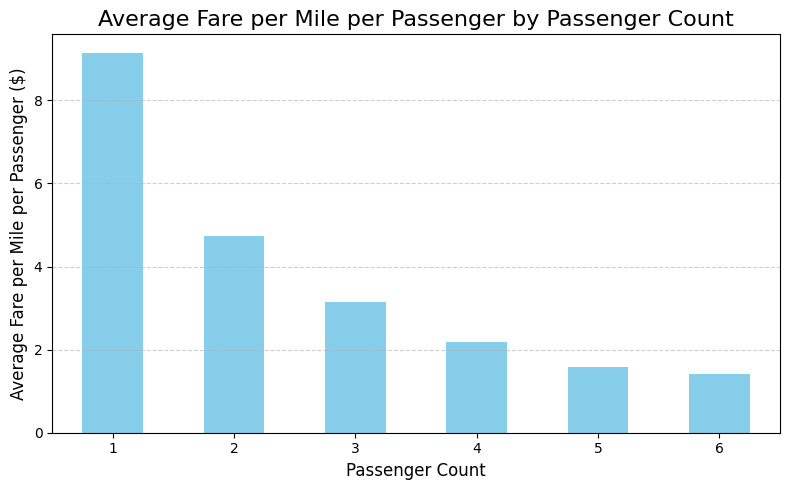

In [ ]:
# Analyse the fare per mile per passenger for different passenger counts
print("\nCalculating fare per mile and fare per mile per passenger...")
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']
merged_data['fare_per_mile_per_passenger'] = merged_data['fare_per_mile'] / merged_data['passenger_count']
merged_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_data.dropna(subset=['fare_per_mile', 'fare_per_mile_per_passenger'], inplace=True)
print("\nGrouping data by passenger count...")
avg_fare = merged_data.groupby('passenger_count')['fare_per_mile_per_passenger'].mean()
avg_fare.index = avg_fare.index.astype(int)
print("\nPlotting the results...")
avg_fare.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Fare per Mile per Passenger by Passenger Count',fontsize=16)
plt.xlabel('Passenger Count',fontsize=12)
plt.ylabel('Average Fare per Mile per Passenger ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(True, axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()



**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week


Calculating fare per mile...

Grouping data by day of the week...

Creating visualizations for Average day...



Creating visualizations for Average hour...


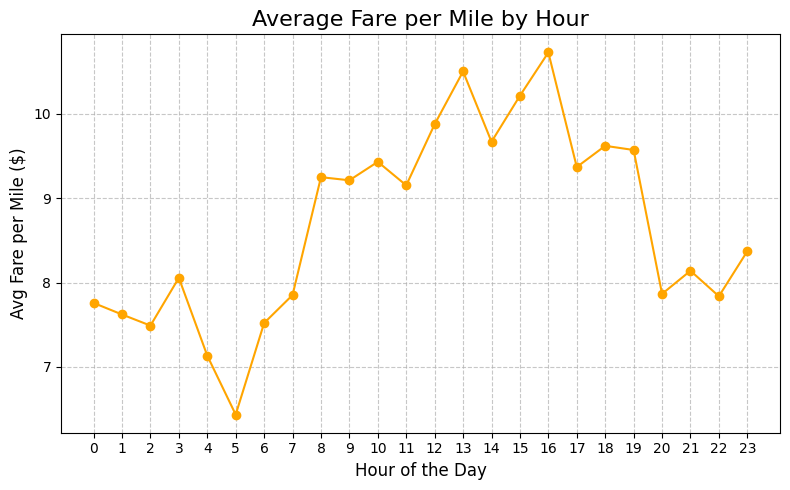

In [ ]:
# Compare the average fare per mile for different days and for different times of the day
print("\nCalculating fare per mile...")
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']
merged_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_data.dropna(subset=['fare_per_mile'], inplace=True)
print("\nGrouping data by day of the week...")
avg_day = merged_data.groupby('pickup_day_of_week')['fare_per_mile'].mean()
avg_hour = merged_data.groupby('pickup_hour')['fare_per_mile'].mean()
print("\nCreating visualizations for Average day...")
avg_day.plot(kind='bar', color='skyblue', figsize=(8, 5))
plt.title('Average Fare per Mile by Day',fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
print("\nCreating visualizations for Average hour...")
avg_hour.plot(kind='line', marker='o', color='orange', figsize=(8, 5))
plt.title('Average Fare per Mile by Hour',fontsize=16)
plt.xlabel('Hour of the Day',fontsize=12)
plt.ylabel('Avg Fare per Mile ($)',fontsize=12)
plt.xticks(range(0, 24))
plt.grid(True, linestyle='--', alpha=0.7)
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [ ]:
# Compare fare per mile for different vendors
print("\nCalculating fare per mile and grouping by VendorID...")
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']
merged_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_data.dropna(subset=['fare_per_mile'], inplace=True)
print("\nGrouping data by VendorID...")
avg_fare = merged_data.groupby('VendorID')['fare_per_mile'].mean()
print("\nPlotting the results...")
avg_fare.plot(kind='bar', color='lightgreen', figsize=(8, 5))
plt.title('Average Fare per Mile by Vendor',fontsize=16)
plt.xlabel('Vendor ID', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



Calculating fare per mile and grouping by VendorID...

Grouping data by VendorID...

Plotting the results...


**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [ ]:
# Defining distance tiers
merged_data['distance_tier'] = pd.cut(
    merged_data['trip_distance'], [0, 2, 5, float('inf')], labels=['0-2 miles', '2-5 miles', '5+ miles']
)
merged_data['fare_per_mile'] = merged_data['fare_amount'] / merged_data['trip_distance']
merged_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_data.dropna(subset=['fare_per_mile'], inplace=True)
print("\nGrouping data by VendorID and distance tier...")
avg_fare = merged_data.groupby(['VendorID', 'distance_tier'])['fare_per_mile'].mean().reset_index()
print("\nVisualizing the results...")
plt.figure(figsize=(8, 5))
sns.barplot(data=avg_fare, x='distance_tier', y='fare_per_mile', hue='VendorID')
plt.title('Avg Fare per Mile by Vendor & Distance',fontsize=16)
plt.xlabel('Distance Tier', fontsize=12)
plt.ylabel('Avg Fare per Mile ($)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Grouping data by VendorID and distance tier...

Visualizing the results...


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?


Calculating tip percentage...

Analyzing tip percentage by trip distance...

Analyzing tip percentage by passenger count...

Visualizing results...


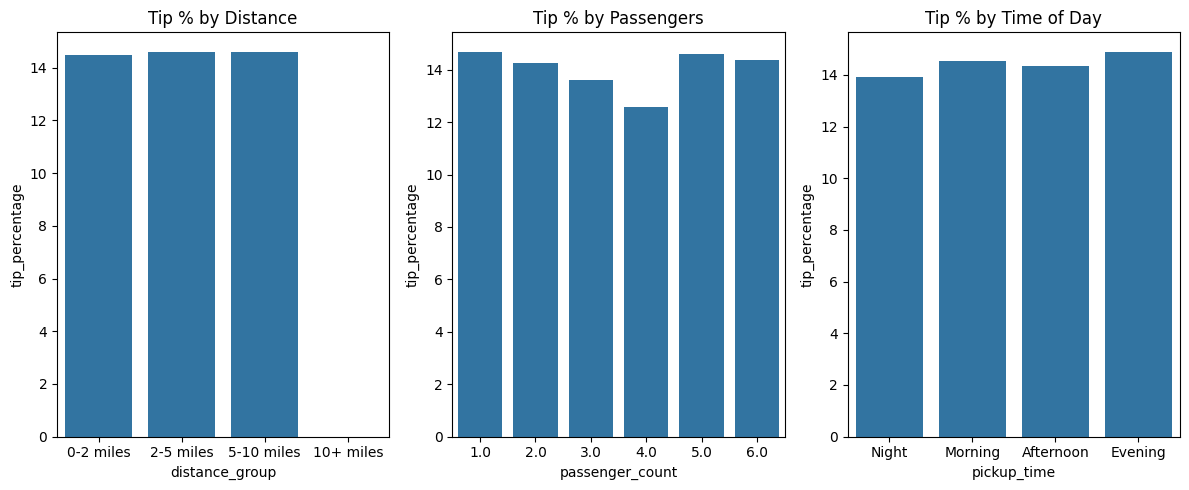

In [ ]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
print("\nCalculating tip percentage...")
merged_data['tip_percentage'] = (merged_data['tip_amount'] / (merged_data['total_amount'] - merged_data['tip_amount'])) * 100
merged_data.replace([float('inf'), -float('inf')], pd.NA, inplace=True)
merged_data.dropna(subset=['tip_percentage'], inplace=True)
print("\nAnalyzing tip percentage by trip distance...")
merged_data['distance_group'] = pd.cut(merged_data['trip_distance'], [0, 2, 5, 10, float('inf')], labels=['0-2 miles', '2-5 miles', '5-10 miles', '10+ miles'])
merged_data['pickup_time'] = pd.cut(merged_data['pickup_hour'], [0, 6, 12, 18, 24], labels=['Night', 'Morning', 'Afternoon', 'Evening'], right=False)
print("\nAnalyzing tip percentage by passenger count...")
tip_by_distance = merged_data.groupby('distance_group')['tip_percentage'].mean().reset_index()
tip_by_passenger = merged_data.groupby('passenger_count')['tip_percentage'].mean().reset_index()
tip_by_time = merged_data.groupby('pickup_time')['tip_percentage'].mean().reset_index()
print("\nVisualizing results...")
fig, axs = plt.subplots(1, 3, figsize=(12, 5))
sns.barplot(data=tip_by_distance, x='distance_group', y='tip_percentage', ax=axs[0])
axs[0].set_title('Tip % by Distance')
sns.barplot(data=tip_by_passenger, x='passenger_count', y='tip_percentage', ax=axs[1])
axs[1].set_title('Tip % by Passengers')
sns.barplot(data=tip_by_time, x='pickup_time', y='tip_percentage', ax=axs[2])
axs[2].set_title('Tip % by Time of Day')

plt.tight_layout()
plt.show()


Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours


Calculating tip percentage...

Creating subsets for comparison...

Calculating average fare and tip amounts for each subset...

Plotting the results i.e comparison of fare_amounts and tip_amounts

Plotting fare amount...


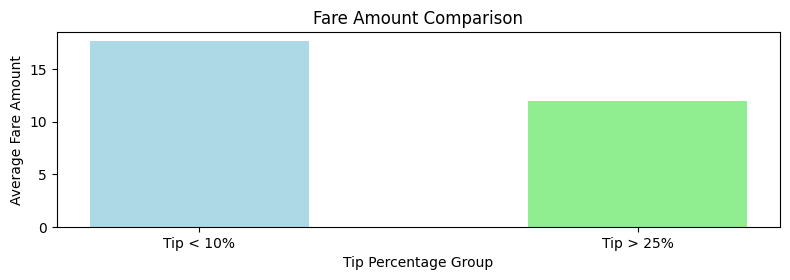


Plotting fare amount...


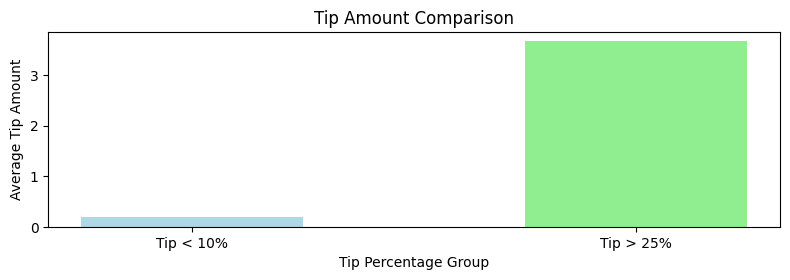

In [ ]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%
print("\nCalculating tip percentage...")
df['tip_percentage'] = (df['tip_amount'] / df['fare_amount']) * 100
print("\nCreating subsets for comparison...")
low_tips = df[df['tip_percentage'] < 10]
high_tips = df[df['tip_percentage'] > 25]
print("\nCalculating average fare and tip amounts for each subset...")
low_tip_fare_mean = low_tips['fare_amount'].mean()
high_tip_fare_mean = high_tips['fare_amount'].mean()
low_tip_tip_mean = low_tips['tip_amount'].mean()
high_tip_tip_mean = high_tips['tip_amount'].mean()
print('\nPlotting the results i.e comparison of fare_amounts and tip_amounts')
plt.figure(figsize=(8, 5))
print('\nPlotting fare amount...')
plt.subplot(2, 1, 1)
bar_width = 0.5
index = ['Tip < 10%', 'Tip > 25%']
plt.bar(index, [low_tip_fare_mean, high_tip_fare_mean], width=bar_width, color=['lightblue', 'lightgreen'])
plt.title('Fare Amount Comparison')
plt.xlabel('Tip Percentage Group')
plt.ylabel('Average Fare Amount')
plt.tight_layout()
plt.show()
print('\nPlotting fare amount...')
plt.figure(figsize=(8, 5))
plt.subplot(2, 1, 2)
plt.bar(index, [low_tip_tip_mean, high_tip_tip_mean], width=bar_width, color=['lightblue', 'lightgreen'])
plt.title('Tip Amount Comparison')
plt.xlabel('Tip Percentage Group')
plt.ylabel('Average Tip Amount')
plt.tight_layout()
plt.show()


**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.


Analyzing passenger count by hour and days...

Visualizing hourly variation...


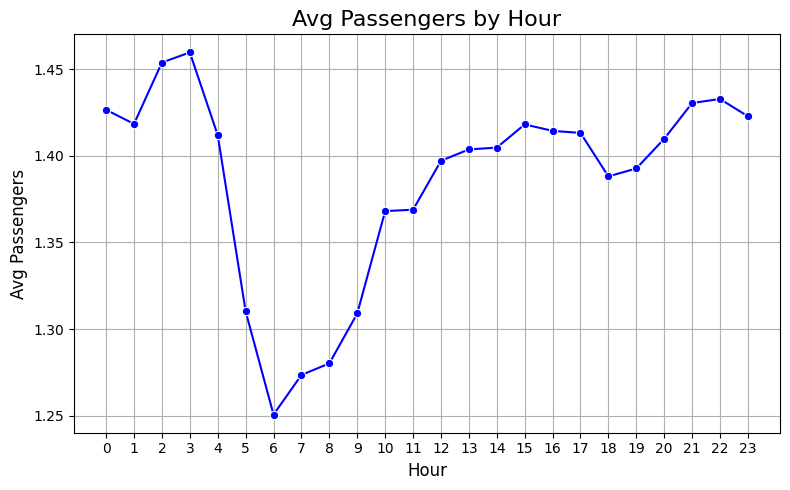


Visualizing daily variation...


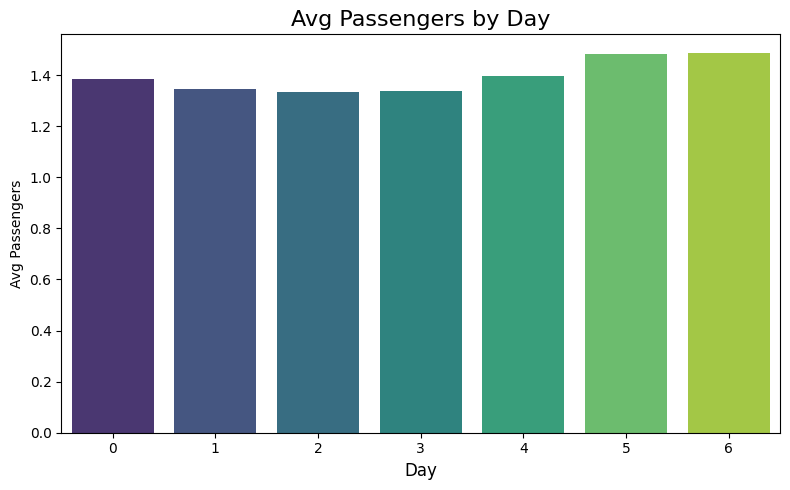

In [ ]:
# See how passenger count varies across hours and days
print("\nAnalyzing passenger count by hour and days...")
hourly_passenger_count = merged_data.groupby('pickup_hour')['passenger_count'].mean()
daily_passenger_count = merged_data.groupby('pickup_day_of_week')['passenger_count'].mean()

print("\nVisualizing hourly variation...")
plt.figure(figsize=(8, 5))
sns.lineplot(x=hourly_passenger_count.index, y=hourly_passenger_count.values, marker='o', color='blue')
plt.title('Avg Passengers by Hour', fontsize=16)
plt.xlabel('Hour',fontsize=12)
plt.ylabel('Avg Passengers',fontsize=12)
plt.xticks(range(0, 24))
plt.grid()
plt.tight_layout()
plt.show()

print("\nVisualizing daily variation...")
plt.figure(figsize=(8, 5))
sns.barplot(x=daily_passenger_count.index, y=daily_passenger_count.values, palette='viridis')
plt.title('Avg Passengers by Day', fontsize=16)
plt.xlabel('Hour',fontsize=12)
plt.xlabel('Day',fontsize=12)
plt.ylabel('Avg Passengers')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()



**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones


Grouping data by zone...

Visualizing passenger counts across zones...


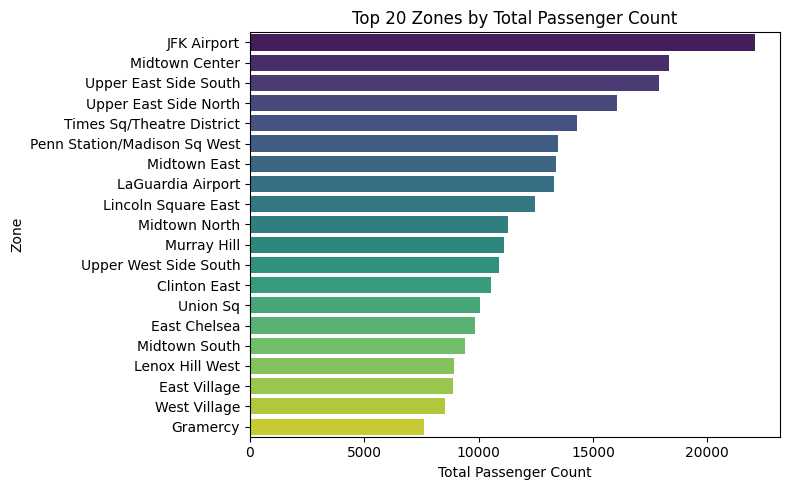

In [ ]:
# How does passenger count vary across zones
print("\nGrouping data by zone...")
zone_passenger_count = (
    merged_data.groupby('zone')['passenger_count']
    .sum()
    .reset_index()
    .rename(columns={'passenger_count': 'Total Passenger Count'})
    .sort_values(by='Total Passenger Count', ascending=False)
)
print("\nVisualizing passenger counts across zones...")
plt.figure(figsize=(8, 5))
sns.barplot(data=zone_passenger_count.head(20), x='Total Passenger Count', y='zone', palette='viridis')
plt.title('Top 20 Zones by Total Passenger Count')
plt.xlabel('Total Passenger Count')
plt.ylabel('Zone')
plt.tight_layout()
plt.show()



Creating a Map...


<Figure size 1400x1000 with 0 Axes>

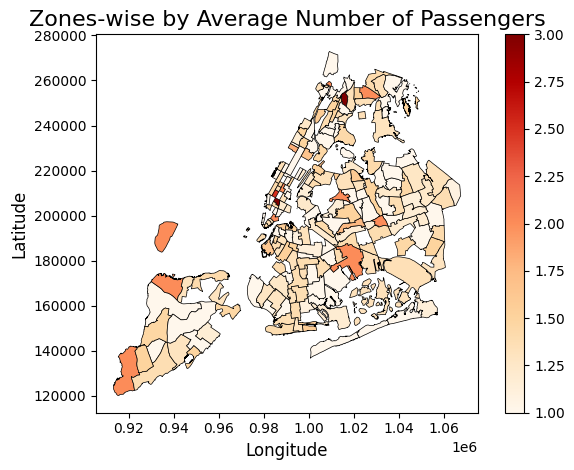

In [ ]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
pickup_avg_passenger = merged_data.groupby('PULocationID')['passenger_count'].mean().reset_index(drop=True)
pickup_avg_passenger
zones['pickup_avg_passenger'] = pickup_avg_passenger
print("\nCreating a Map...")
plt.figure(figsize=(14, 10))
zones.plot(column='pickup_avg_passenger',cmap='OrRd', legend=True,  edgecolor='black', linewidth=0.5)
plt.title('Zones-wise by Average Number of Passengers', fontsize=16)
plt.xlabel('Longitude', fontsize=12)
plt.ylabel('Latitude', fontsize=12)
plt.grid(False)
plt.tight_layout()
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

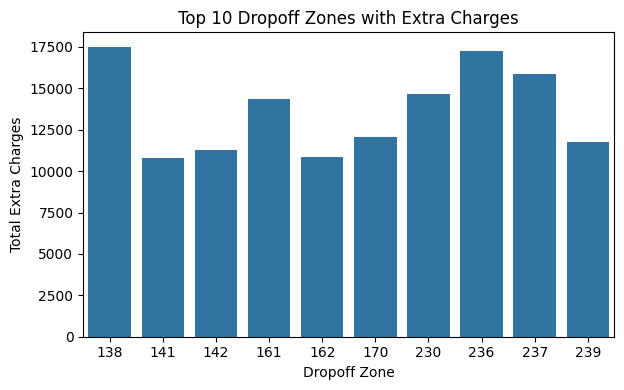

In [ ]:
# How often is each surcharge applied?
columns_of_interest = ['PULocationID', 'DOLocationID', 'pickup_hour', 'extra']
data = merged_data[columns_of_interest]
pickup_extra_zones = data.groupby('PULocationID')['extra'].sum().sort_values(ascending=False)
dropoff_extra_zones = data.groupby('DOLocationID')['extra'].sum().sort_values(ascending=False)
hourly_extra_charges = data.groupby('pickup_hour')['extra'].sum()

# Plotting Map of Pickup Zones with Extra Charges
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 1)
sns.barplot(x=pickup_extra_zones.index[:10], y=pickup_extra_zones.values[:10])
plt.title('Top 10 Pickup Zones with Extra Charges')
plt.xlabel('Pickup Zone')
plt.ylabel('Total Extra Charges')
plt.tight_layout()
plt.show()

# PLotting Map of Dropoff Zones with Extra Charges
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 2)
sns.barplot(x=dropoff_extra_zones.index[:10], y=dropoff_extra_zones.values[:10])
plt.title('Top 10 Dropoff Zones with Extra Charges')
plt.xlabel('Dropoff Zone')
plt.ylabel('Total Extra Charges')
plt.tight_layout()
plt.show()

# PLotting Map of Extra Charges by Pickup Hour
plt.figure(figsize=(18, 4))
plt.subplot(1, 3, 3)
sns.barplot(x=hourly_extra_charges.index, y=hourly_extra_charges.values)
plt.title('Extra Charges by Pickup Hour')
plt.xlabel('Pickup Hour')
plt.ylabel('Total Extra Charges')
plt.tight_layout()
plt.show()

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

### **Recommendation to optimize routing and dispactching -**

- High demand zones during peak hours should have more cabs available, especially at night from 11 PM to 5 AM. Slow routes during specific hours show traffic congestion, so we should use alternative routes to avoid delays.  

- Morning and evening rush hours (8 –10 AM and 5 PM–7 PM) need more cabs to meet demand.

- Early morning hours can be used for maintenance and repositioning cabs to busy areas. These adjustments can optimize operations efficiently.

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

### Strategies for positioning cabs  are-**

- To optimize cab positioning, high-demand zones like entertainment districts and airports during nighttime hours (11 PM–5 AM) need more cabs for better access.  

- On weekdays, work commutes drive higher trip volumes, we should focus on business and residential part.  

- Weekends show longer trips, requiring more cabs near tourist spots and shopping areas. For zones with high pickup/dropoff ratios, we can set up more cabs to meet demand and reposition them from low-demand areas to improve efficiency. These strategies help us balance supply and demand effectively.

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

### **Pricing Strategy Adjustments-**

- High pricing during peak hours can boost revenue and control demand, while discounts in off-peak times allow more riders.  

- Adjusting fares based on distance ensures difficulty for short trips and higher returns for long trips.  

- Comparing vendor rates can help to stay competitive and group discounts for more passengers promote shared rides and better cab utilization. These steps optimize pricing effectively.